# Info
Name:  

    MOC_DARE_single_sol

Purpose:  

    Determine the exactitude of the MOC DARE calculations and their uncertainty
  
Input:

    none at command line
    see methods of module

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - scipy : for saving and reading
    - math
    - pdb
    - datetime
    - load_utils
    - matplotlib
    
Needed Files:

    - MOC_1solx_DARE_{vv}_{num}.mat
  
  
Modification History:

    Wrtten: Samuel LeBlanc, Bathurst, NB, 2017-10-06
    Modified: 

# Load the required modules and file paths

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.cm as cm
import numpy as np

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
fp = 'C:\\Users\\sleblan2\\Research\\Calipso\\moc\\MOCsolutions_individual\\'

In [3]:
vv = 'v1'

# Prepare and load the single solution files

In [4]:
nums = [19373,22134,200121,3000,499,53001,4200,19477,6367,918,18802,65533]
labels = ['Sahara (Algeria)','Amazon','Indian Ocean (E of Africa)','South Pacific','Pacific Equator','South China Sea',
          'Nigeria','Sahara','Bangladesh','South East Atlantic (Sao Tome)','Bay of Bangladesh','East China Sea']
aods_calipso = [0.33,0.13,0.13,0.057,0.046,0.12,0.34,0.68,0.74,0.6,0.4,0.5]
surf = [1,1,0,0,0,0,1,1,1,0,0,0] #ocean = 0, land = 1
srf_str = ['ocean','land']

In [9]:
# nums = [4201,19478,6368,919,18803,65534]
# labels = ['Nigeria','Sahara','Bangladesh','South East Atlantic (Sao Tomé)','Bay of Bangal','East China Sea']

In [5]:
so = []
dftoa,dfsfc,dftoai,dfsfci = [],[],[],[]
toa_sel,sfc_sel,toa_seli,sfc_seli = [],[],[],[]
i_str = ['m1','s0','p1']
ssa,ext,asy = [],[],[]

In [6]:
for i,n in enumerate(nums):
    print 'MOC_1solx_DARE_{vv}_{num}.mat'.format(vv=vv,num=n)
    s = sio.loadmat(fp+'MOC_1solx_DARE_{vv}_{num}.mat'.format(vv=vv,num=n))
    so.append(s['solutions'][0])
    dftoa.append(np.array([s['solutions'][0,i]['dF_toa_24hr'][0,0][0,0] for i in xrange(len(s['solutions'][0,:]))]))
    dfsfc.append(np.array([s['solutions'][0,i]['dF_sfc_24hr'][0,0] for i in xrange(len(s['solutions'][0,:]))])[:,0,0])
    dftoai.append(np.array([s['solutions'][0,i]['dF_toa_instant'][0,0][0,0] for i in xrange(len(s['solutions'][0,:]))]))
    dfsfci.append(np.array([s['solutions'][0,i]['dF_sfc_instant'][0,0] for i in xrange(len(s['solutions'][0,:]))])[:,0,0])
    t,sf,ti,sfi = {},{},{},{}
    for ie in [-1,0,1]:
        for ia in [-1,0,1]:
            for im in [-1,0,1]:
                form = {'num':n,'e':i_str[ie+1],'a':i_str[ia+1],'s':i_str[im+1]}
                val = '{e}{a}{s}'.format(**form)
                t[val] = s['select'][val][0][0]['dF_toa_24hr'][0][0][0][0]
                sf[val] = s['select'][val][0][0]['dF_sfc_24hr'][0][0][0][0]
                ti[val] = s['select'][val][0][0]['dF_toa_instant'][0][0][0][0]
                sfi[val] = s['select'][val][0][0]['dF_sfc_instant'][0][0][0][0]
    toa_sel.append(t)
    sfc_sel.append(sf)
    toa_seli.append(ti)
    sfc_seli.append(sfi)
    
    ssa.append(np.array([s['solutions'][0,i]['ssa'][0,0][0,8] for i in xrange(len(s['solutions'][0,:]))]))
    ext.append(np.array([s['solutions'][0,i]['ext'][0,0][0,8] for i in xrange(len(s['solutions'][0,:]))]))
    asy.append(np.array([s['solutions'][0,i]['asy'][0,0][0,8] for i in xrange(len(s['solutions'][0,:]))]))

MOC_1solx_DARE_v1_19373.mat
MOC_1solx_DARE_v1_22134.mat
MOC_1solx_DARE_v1_200121.mat
MOC_1solx_DARE_v1_3000.mat
MOC_1solx_DARE_v1_499.mat
MOC_1solx_DARE_v1_53001.mat
MOC_1solx_DARE_v1_4200.mat
MOC_1solx_DARE_v1_19477.mat
MOC_1solx_DARE_v1_6367.mat
MOC_1solx_DARE_v1_918.mat
MOC_1solx_DARE_v1_18802.mat
MOC_1solx_DARE_v1_65533.mat


# Plot the histogram for each pixel

## Plot the SSA, ASY, and EXT for each pixel

<IPython.core.display.Javascript object>


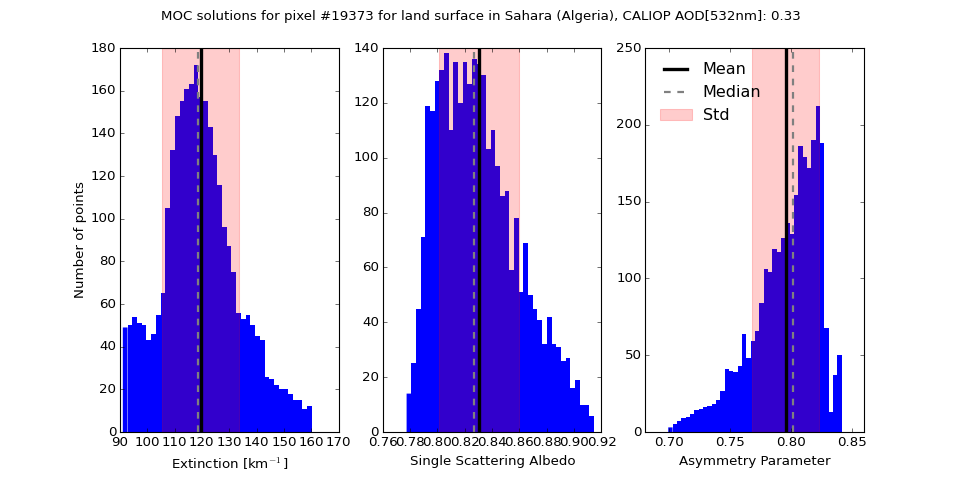

<IPython.core.display.Javascript object>


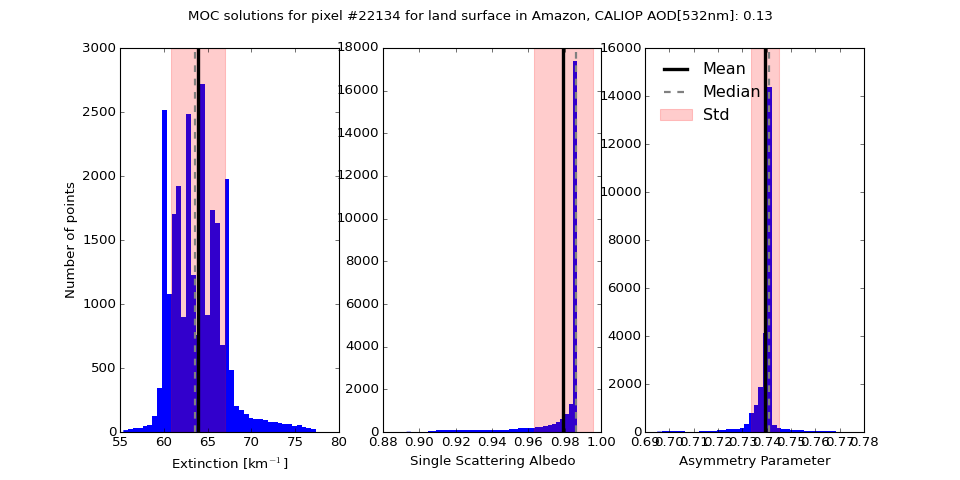

<IPython.core.display.Javascript object>


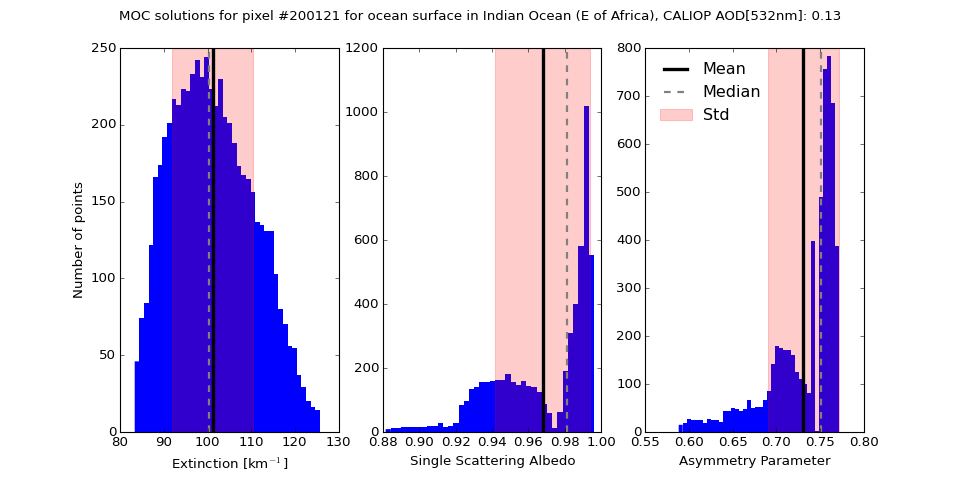

<IPython.core.display.Javascript object>


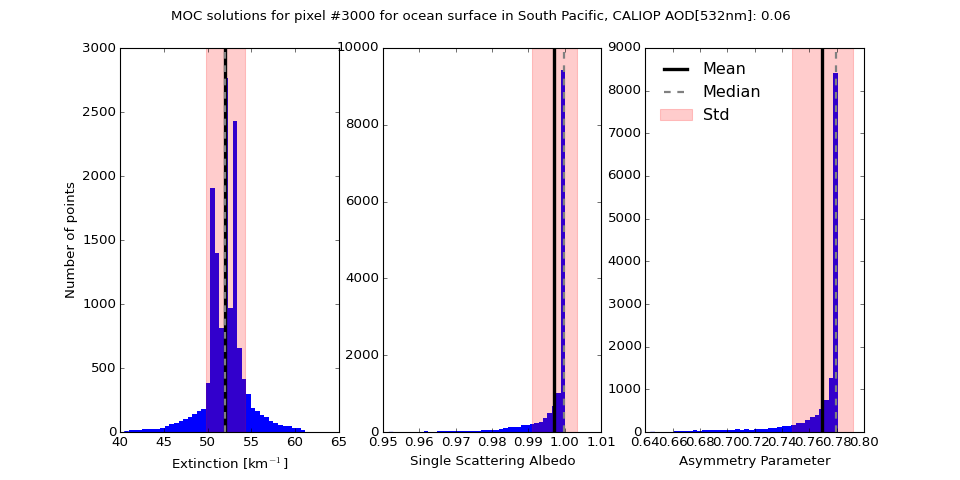

<IPython.core.display.Javascript object>


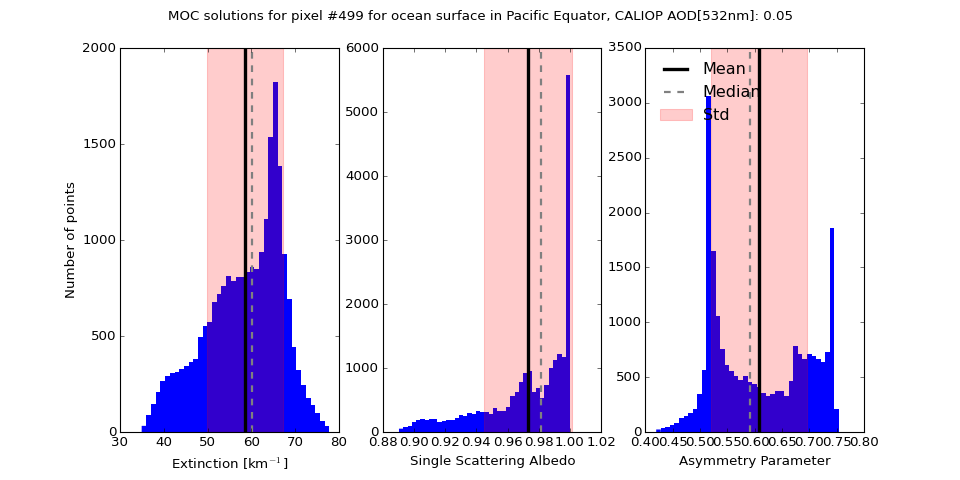

<IPython.core.display.Javascript object>


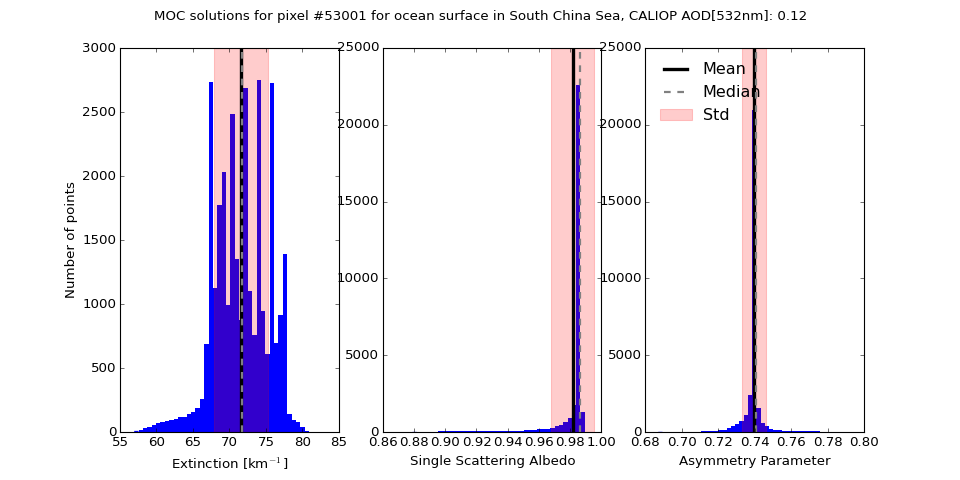

<IPython.core.display.Javascript object>


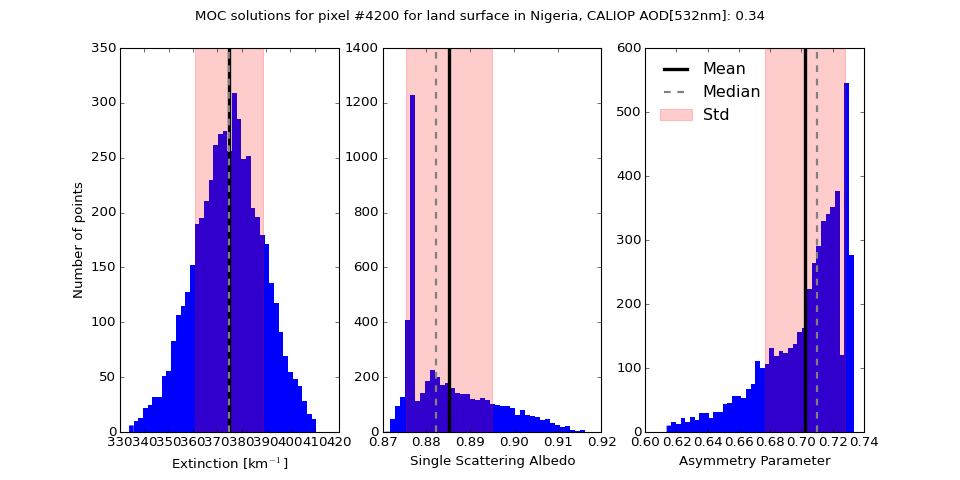

<IPython.core.display.Javascript object>


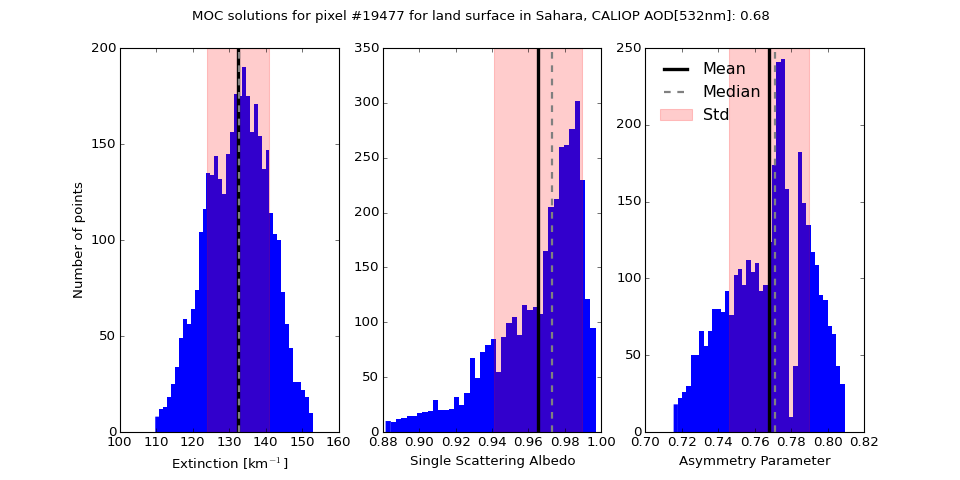

<IPython.core.display.Javascript object>


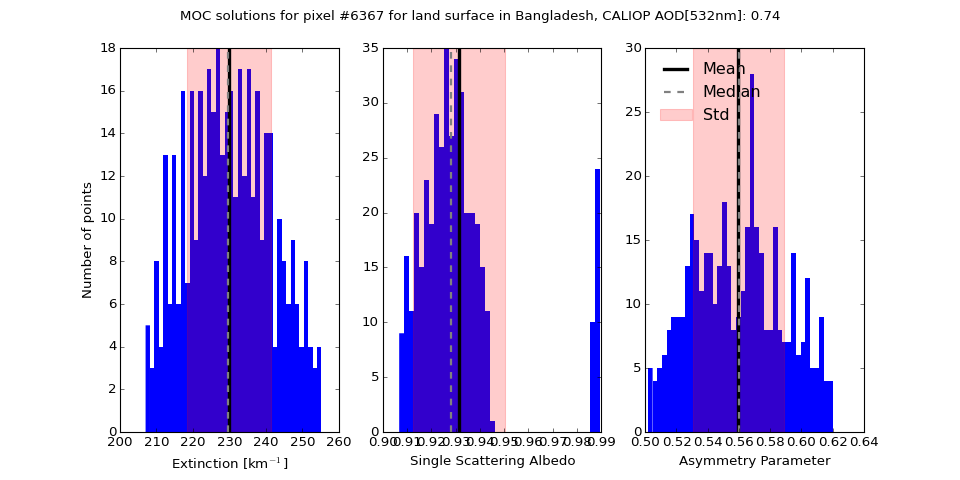

<IPython.core.display.Javascript object>


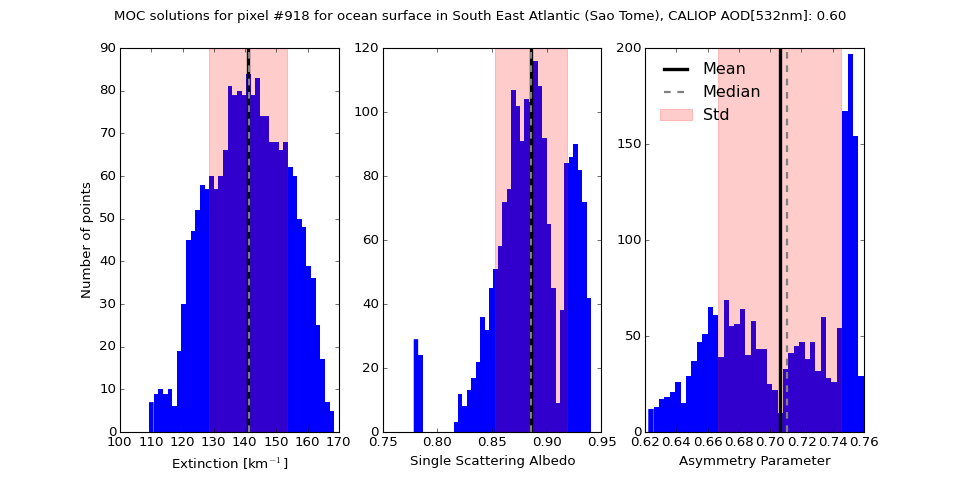

<IPython.core.display.Javascript object>


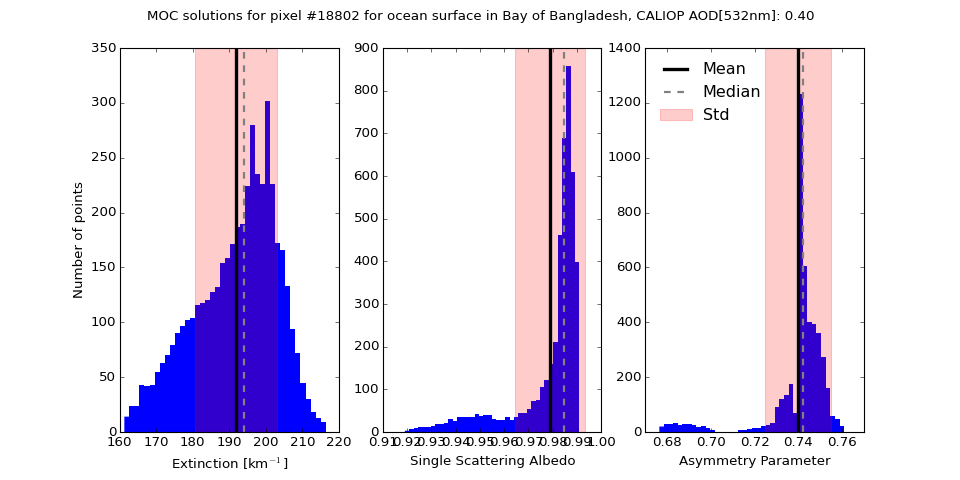

<IPython.core.display.Javascript object>


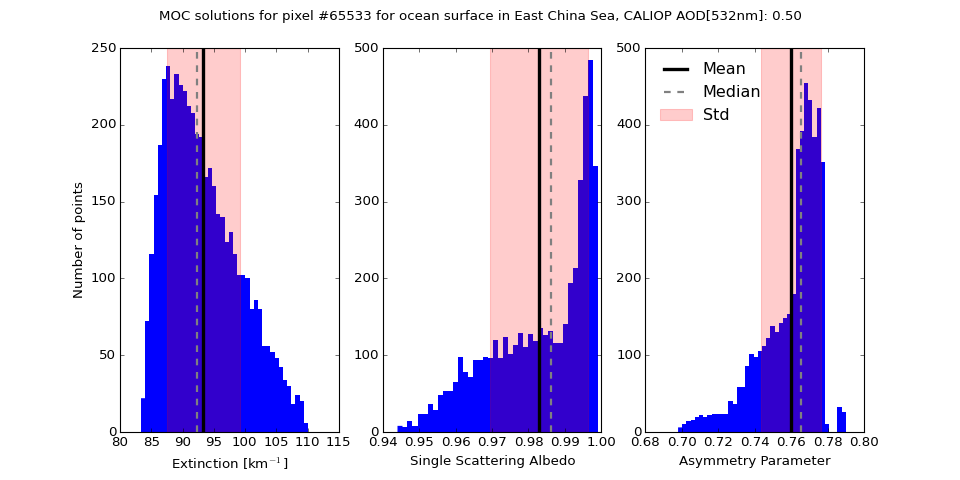

In [7]:
for i,n in enumerate(nums):

    fig,ax = plt.subplots(1,3,figsize=(12,6))

    ax[0].hist(ext[i],bins=40,edgecolor='None')
    ax[0].axvline(np.mean(ext[i]),color='k',lw=3,label='Mean')
    ax[0].axvline(np.median(ext[i]),color='grey',ls='--',lw=2,label='Median')
    ax[0].axvspan(np.mean(ext[i])-np.std(ext[i]), np.mean(ext[i])+np.std(ext[i]), alpha=0.2, color='red',label='Std')
    ax[0].set_ylabel('Number of points')
    ax[0].set_xlabel('Extinction [km$^{{-1}}$]')

    ax[1].hist(ssa[i],bins=40,edgecolor='None')
    ax[1].axvline(np.mean(ssa[i]),color='k',lw=3,label='Mean')
    ax[1].axvline(np.median(ssa[i]),color='grey',ls='--',lw=2,label='Median')
    ax[1].axvspan(np.mean(ssa[i])-np.std(ssa[i]), np.mean(ssa[i])+np.std(ssa[i]), alpha=0.2, color='red',label='Std')
    ax[1].set_xlabel('Single Scattering Albedo')

    ax[2].hist(asy[i],bins=40,edgecolor='None')
    ax[2].axvline(np.mean(asy[i]),color='k',lw=3,label='Mean')
    ax[2].axvline(np.median(asy[i]),color='grey',ls='--',lw=2,label='Median')
    ax[2].axvspan(np.mean(asy[i])-np.std(asy[i]), np.mean(asy[i])+np.std(asy[i]), alpha=0.2, color='red',label='Std')
    ax[2].set_xlabel('Asymmetry Parameter')
    form = {'num':n,'surf':srf_str[surf[i]],'lbl':labels[i],'aod':aods_calipso[i]}

    fig.suptitle('MOC solutions for pixel #{num} for {surf} surface in {lbl}, CALIOP AOD[532nm]: {aod:1.2f}'.format(**form))

    plt.legend(loc=2,frameon=False)
    plt.savefig(fp+'\\plot\\MOC_solutions_hist_{num}_{surf}.png'.format(**form),dpi=600,transparent=True)

## Plot the DARE calculations histogram for each pixel, with selected solutions

### plot the 24hr averages

In [45]:
sel_list = np.sort(toa_sel[0].keys()).astype(list)

<IPython.core.display.Javascript object>


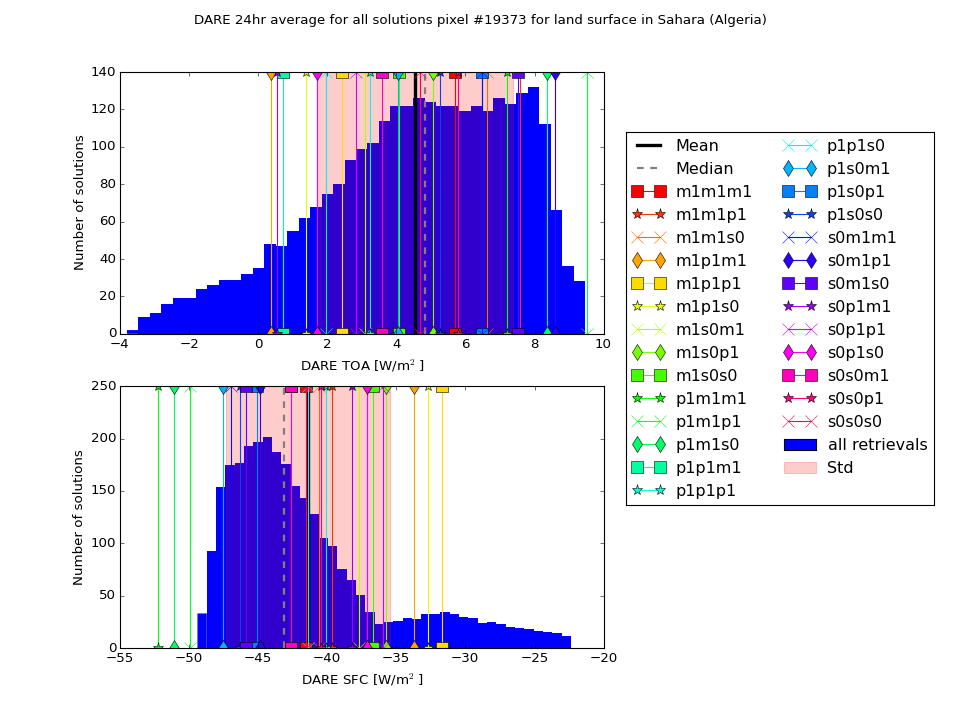

<IPython.core.display.Javascript object>


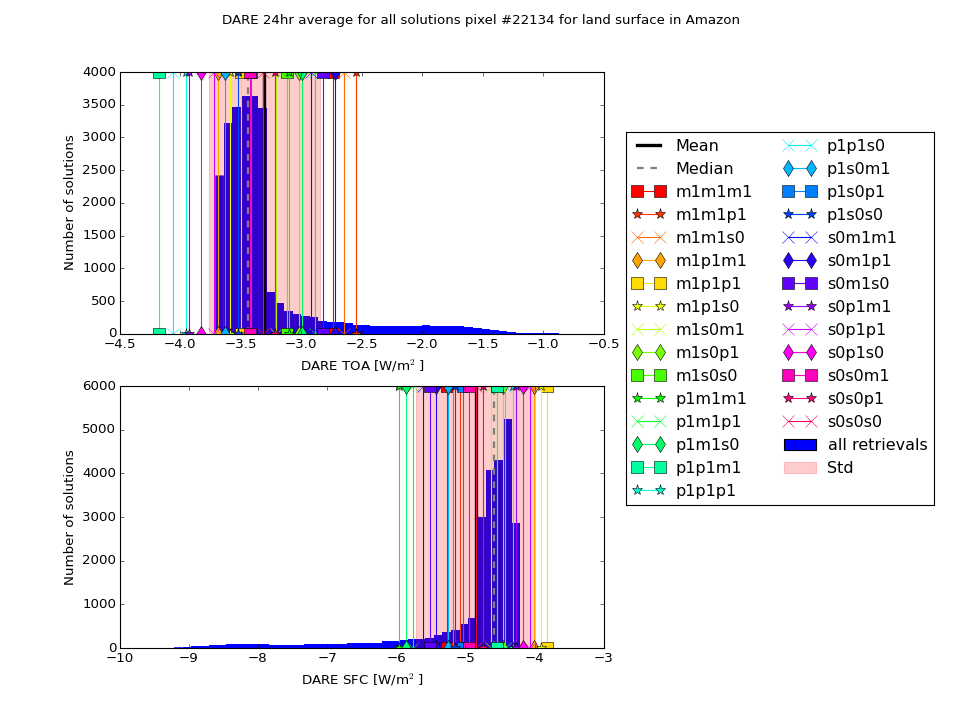

<IPython.core.display.Javascript object>


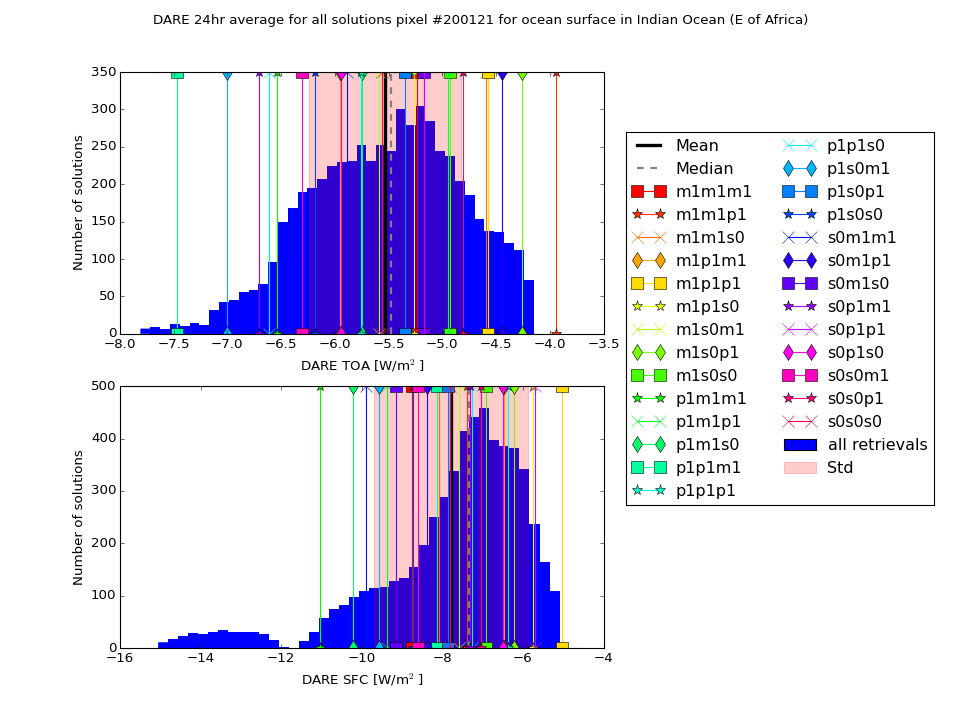

<IPython.core.display.Javascript object>


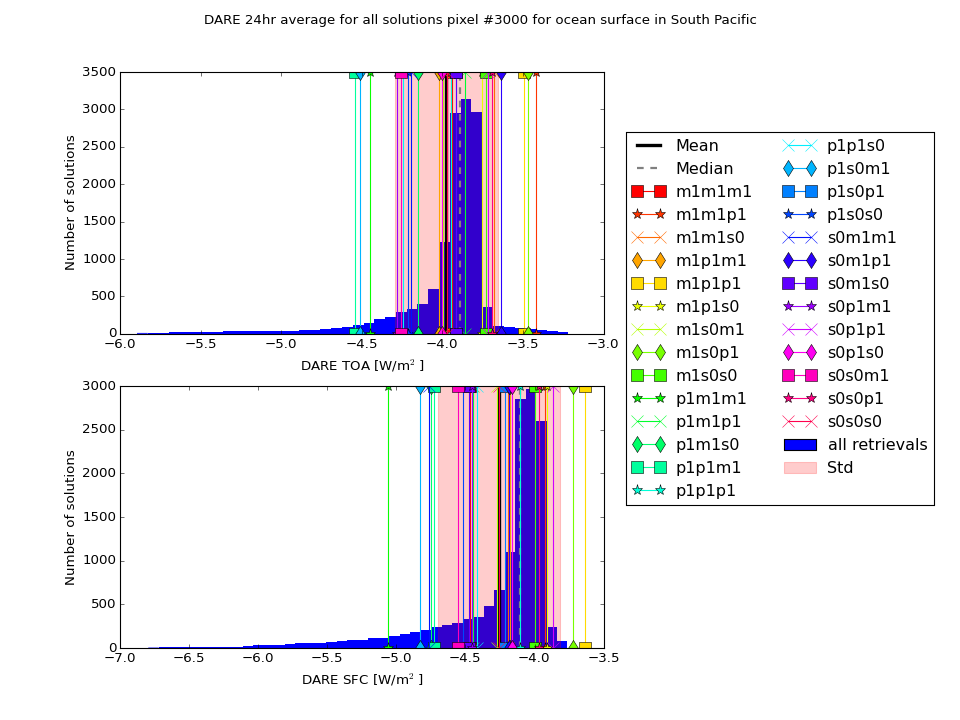

<IPython.core.display.Javascript object>


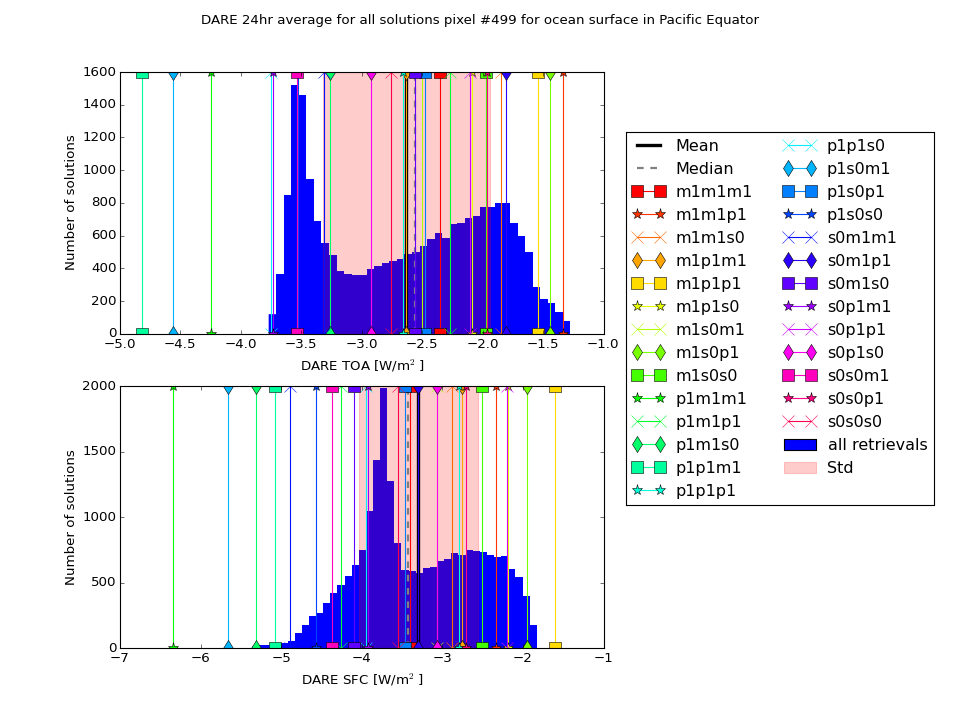

<IPython.core.display.Javascript object>


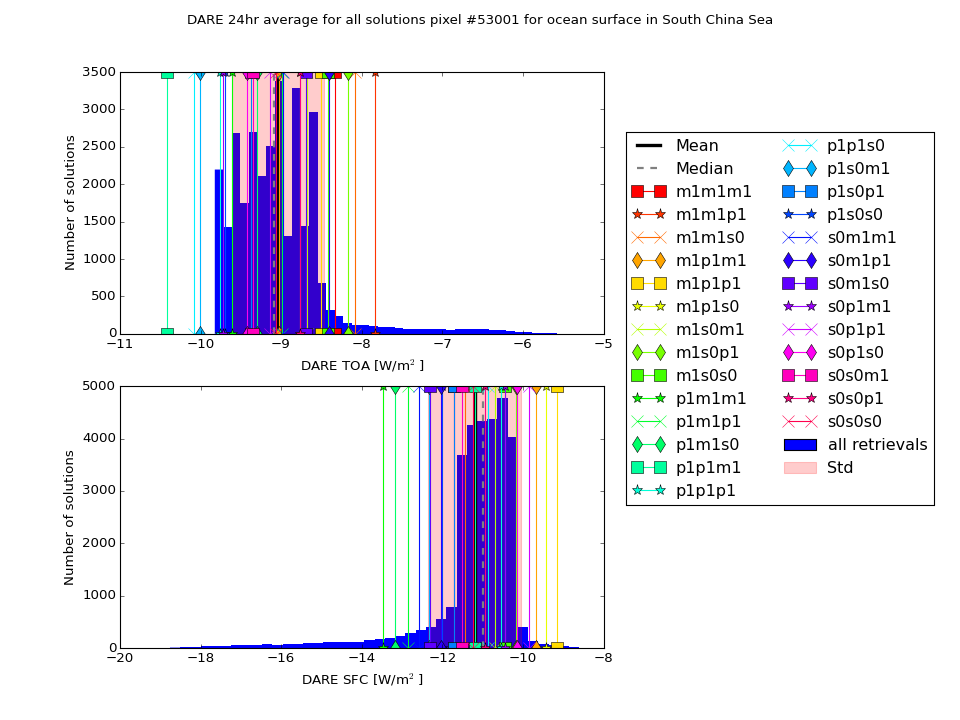

<IPython.core.display.Javascript object>


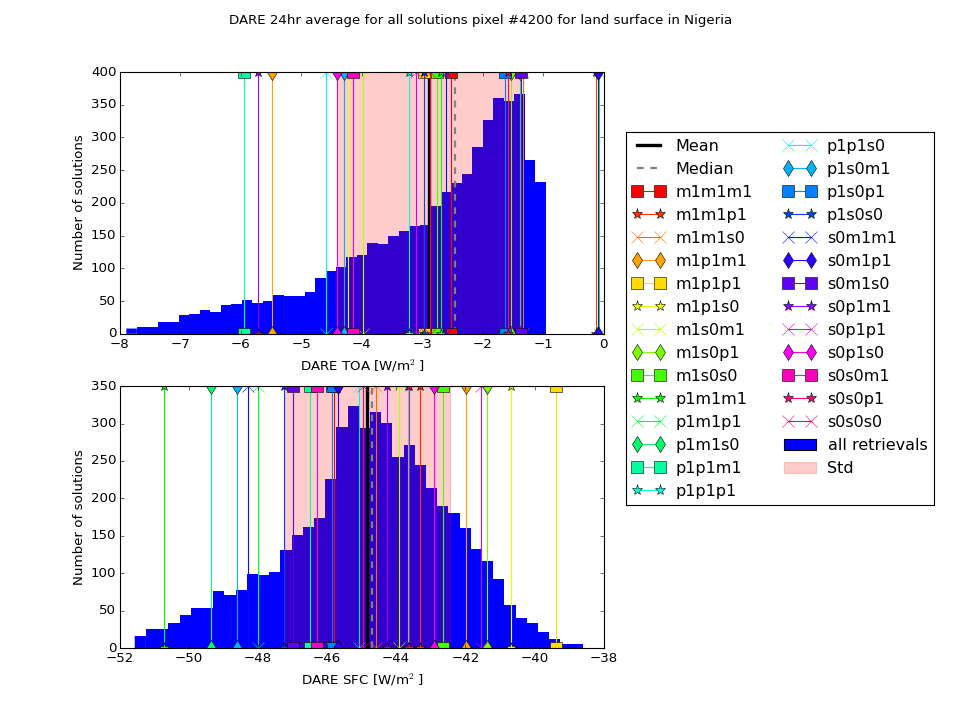

<IPython.core.display.Javascript object>


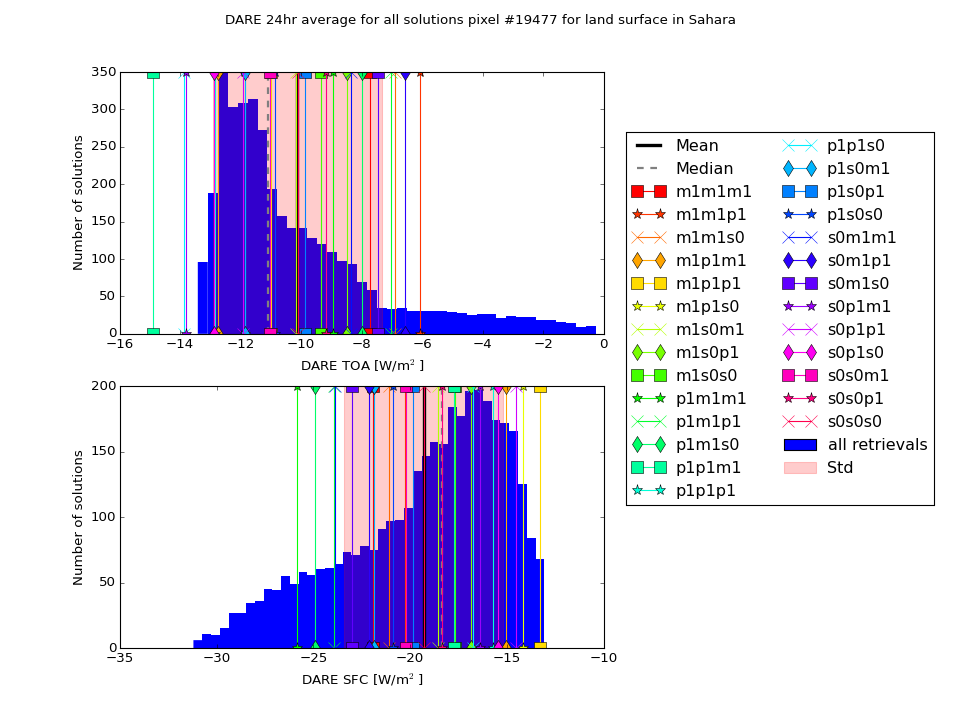

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


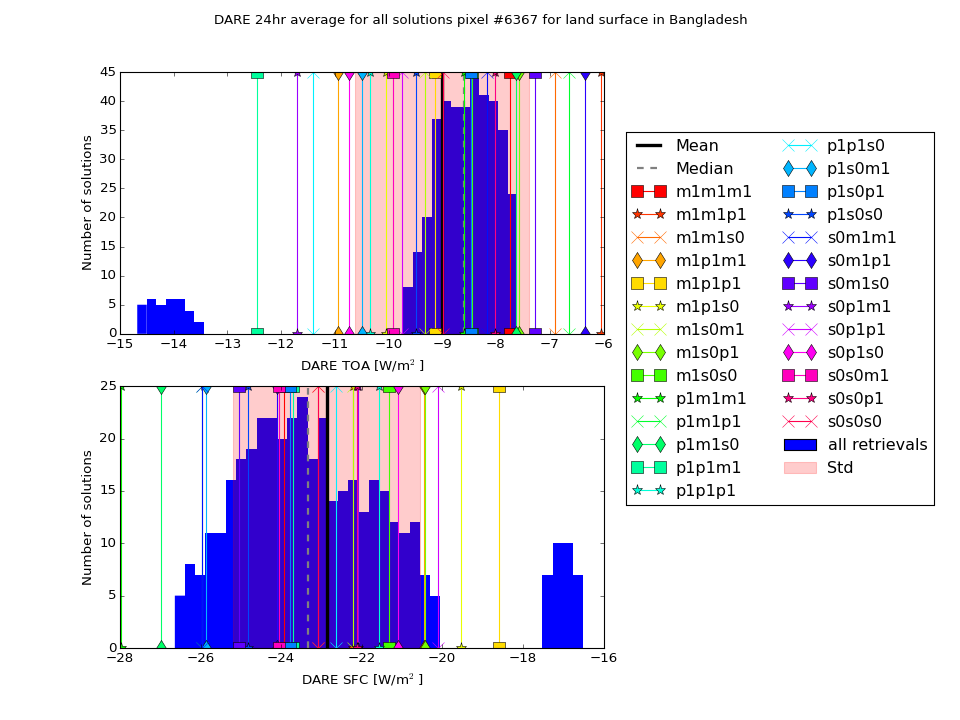

<IPython.core.display.Javascript object>


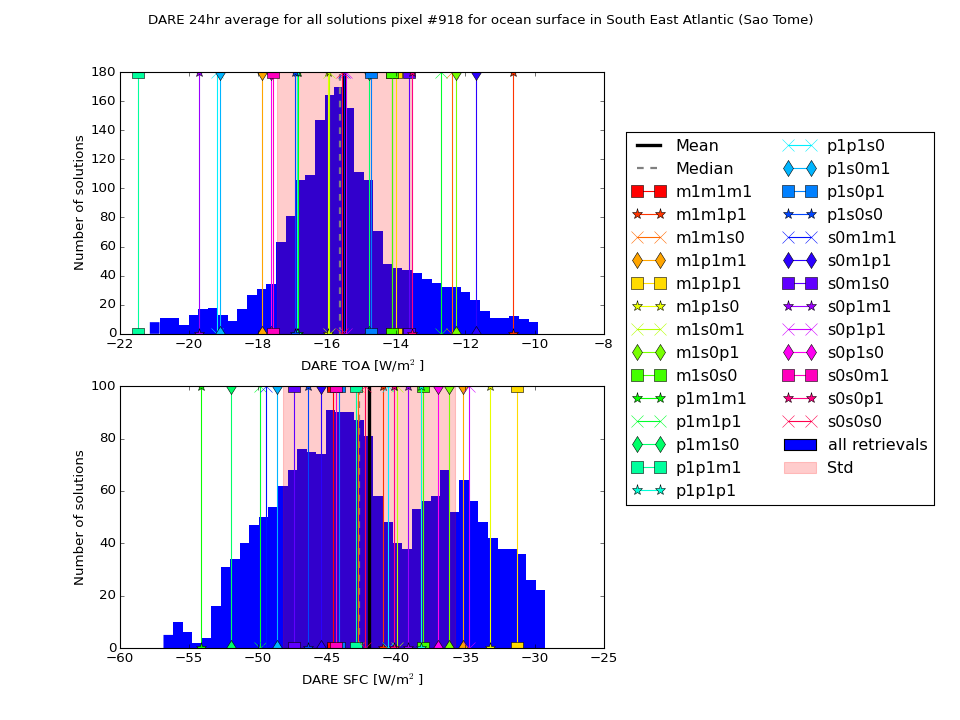

<IPython.core.display.Javascript object>


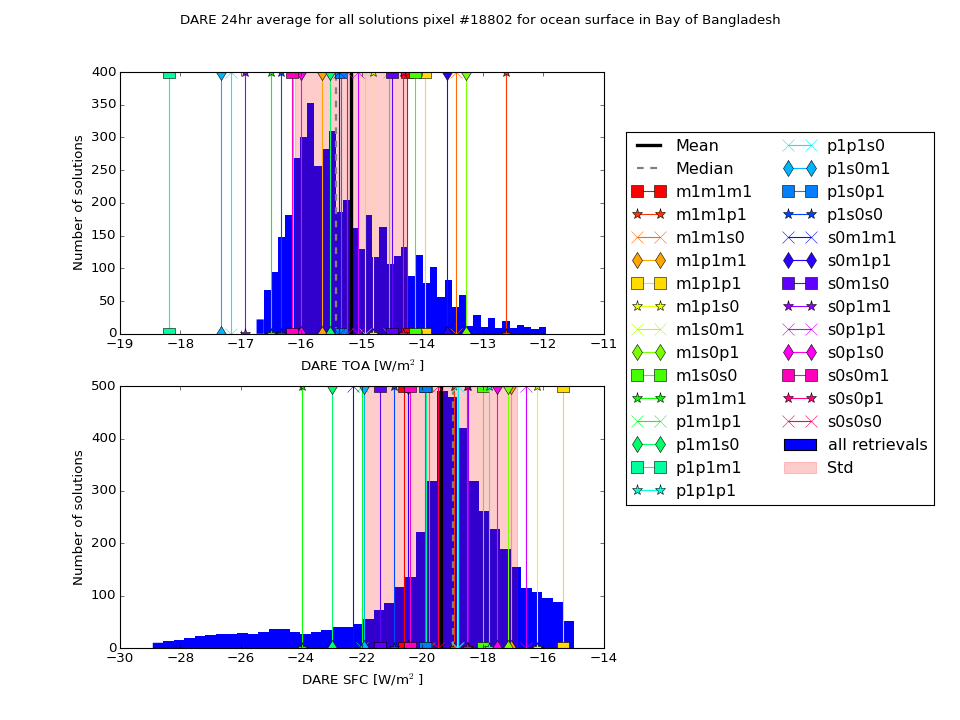

<IPython.core.display.Javascript object>


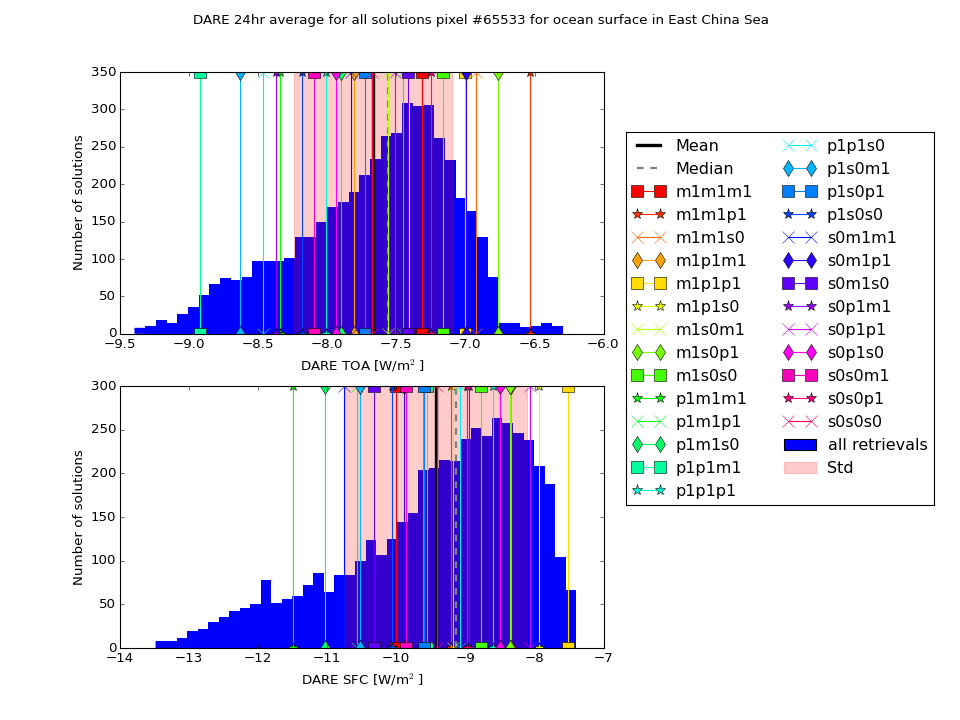

In [9]:
for i,n in enumerate(nums):

    form = {'num':n,'surf':srf_str[surf[i]],'lbl':labels[i],'aod':aods_calipso[i]}
    fig,ax = plt.subplots(2,1,figsize=(12,9))

    ax[0].hist(dftoa[i],bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
    ax[0].axvline(np.mean(dftoa[i]),color='k',lw=3,label='Mean')
    ax[0].axvline(np.median(dftoa[i]),color='grey',ls='--',lw=2,label='Median')
    cs = cm.hsv(np.arange(27)/27.0)
    ms = ['s','*','x','d']
    for j,k in enumerate(np.sort(toa_sel[i].keys())):
        ax[0].axvline(toa_sel[i][k],lw=1,label=k,ls='-',color=tuple(cs[j,:]),marker=ms[j%4],ms=10)
    ax[0].axvspan(np.mean(dftoa[i])-np.std(dftoa[i]), np.mean(dftoa[i])+np.std(dftoa[i]), alpha=0.2, color='red',label='Std')
    ax[0].set_xlabel('DARE TOA [W/m$^2$]')
    ax[0].set_ylabel('Number of solutions')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.65, box.height])


    ax[1].hist(dfsfc[i],bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
    ax[1].axvline(np.mean(dfsfc[i]),color='k',lw=3,label='Mean')
    ax[1].axvline(np.median(dfsfc[i]),color='grey',ls='--',lw=2,label='Median')
    for j,k in enumerate(np.sort(sfc_sel[i].keys())):
        ax[1].axvline(sfc_sel[i][k],lw=1,label=k,ls='-',color=tuple(cs[j,:]),marker=ms[j%4],ms=10)
    ax[1].axvspan(np.mean(dfsfc[i])-np.std(dfsfc[i]), np.mean(dfsfc[i])+np.std(dfsfc[i]), alpha=0.2, color='red',label='Std')
    ax[1].set_xlabel('DARE SFC [W/m$^2$]')
    ax[1].set_ylabel('Number of solutions')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.65, box.height])

    fig.suptitle('DARE 24hr average for all solutions pixel #{num} for {surf} surface in {lbl}'.format(**form))
    plt.legend(bbox_to_anchor=(1.03,2),loc=2,ncol=2)

    plt.savefig(fp+'plot\\DARE_24h_{num}_{surf}.png'.format(**form),dpi=600,transparent=True)

### plot the instantaneous DARE values

<IPython.core.display.Javascript object>


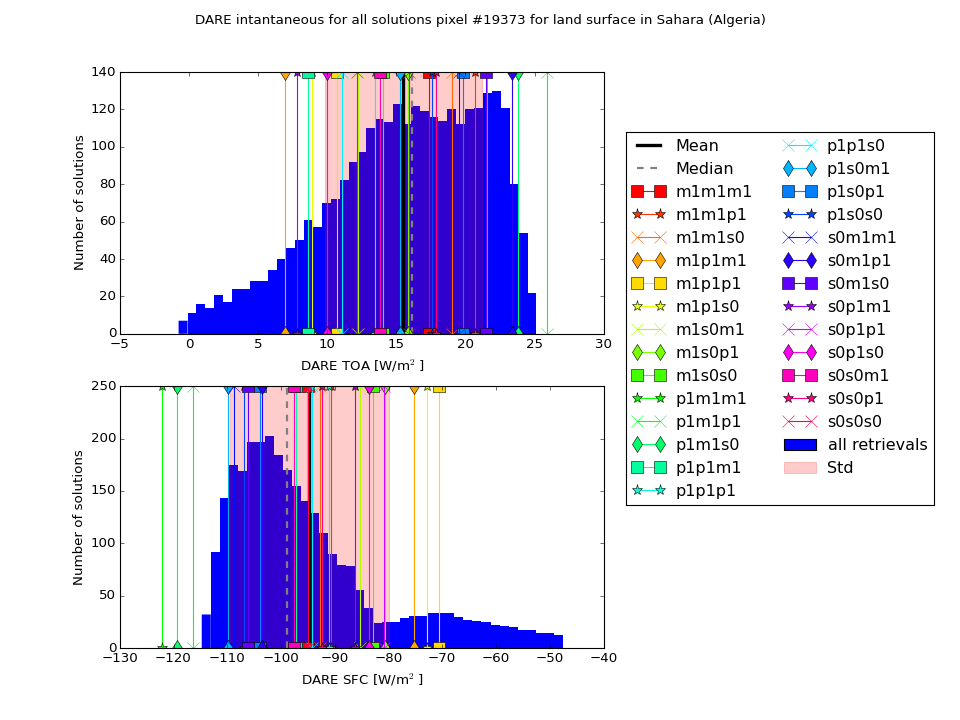

<IPython.core.display.Javascript object>


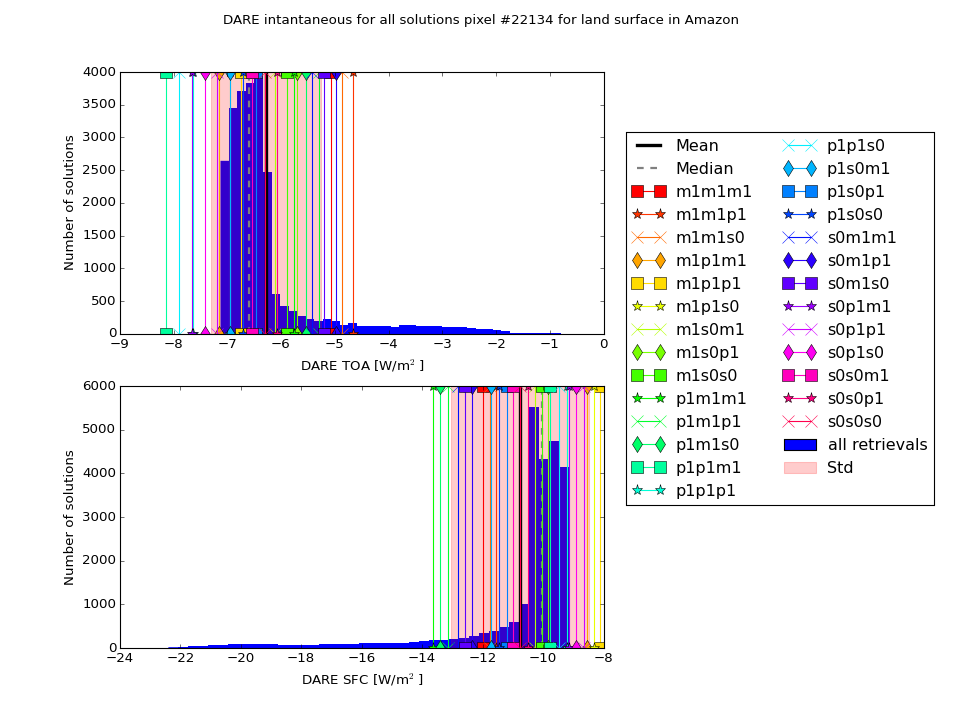

<IPython.core.display.Javascript object>


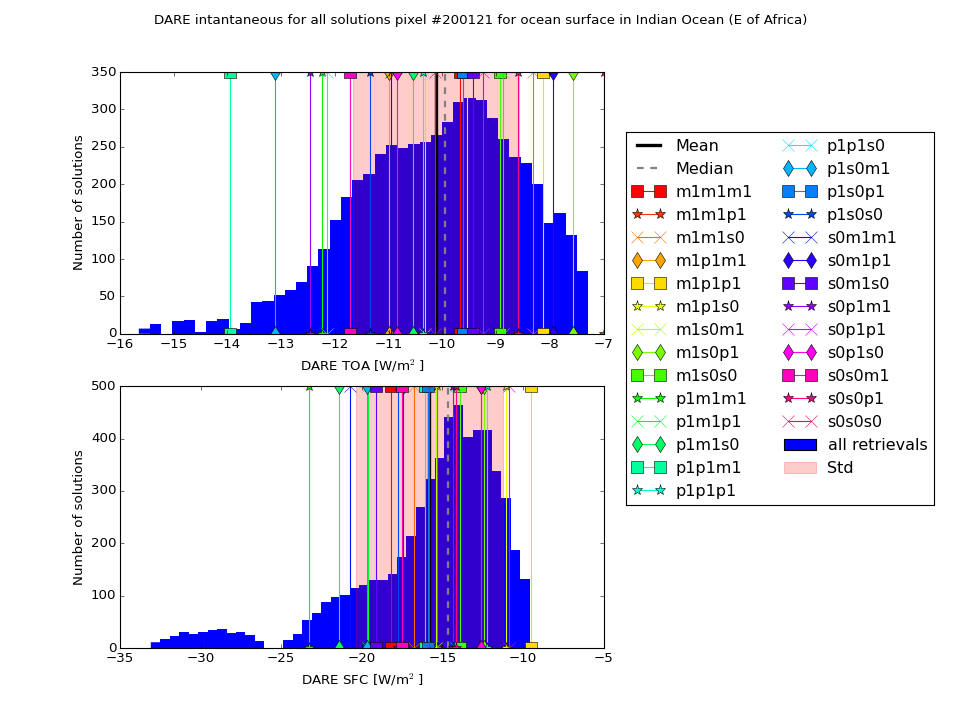

<IPython.core.display.Javascript object>


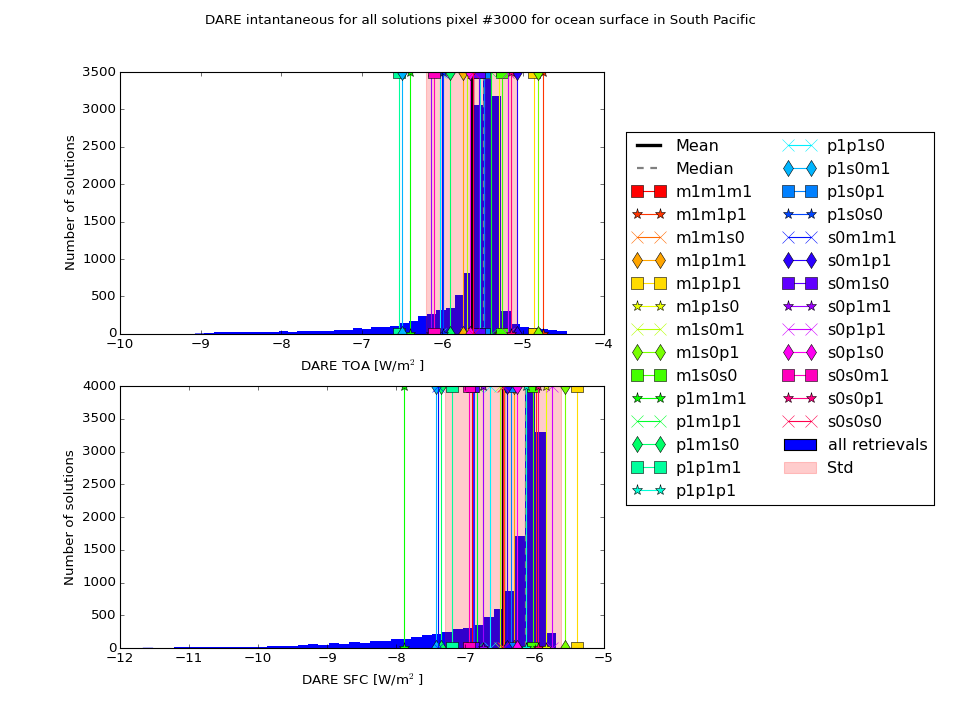

<IPython.core.display.Javascript object>


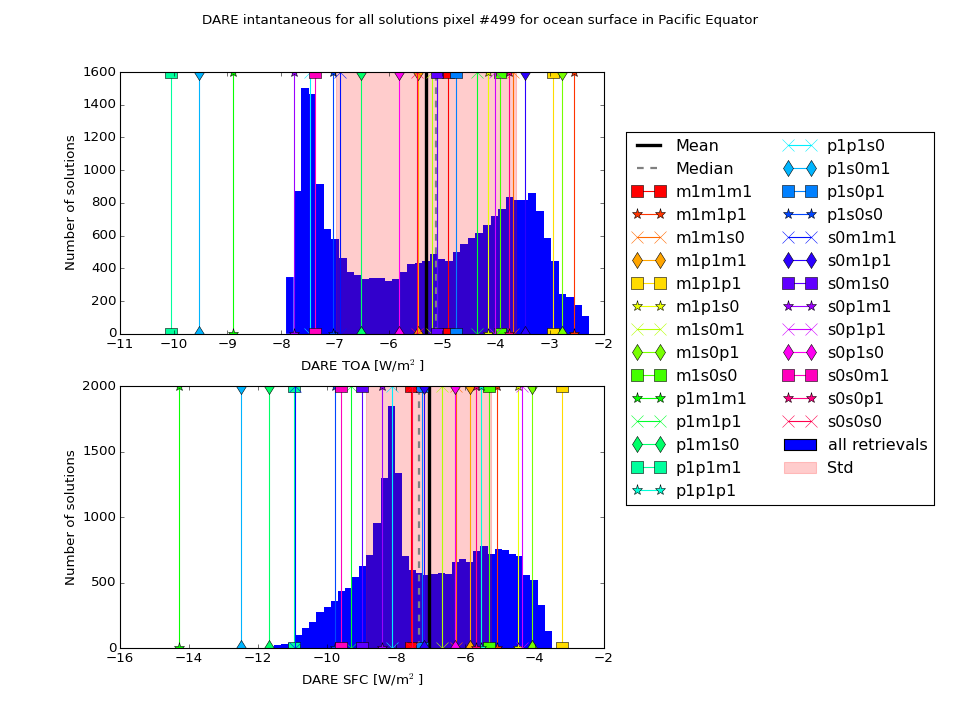

<IPython.core.display.Javascript object>


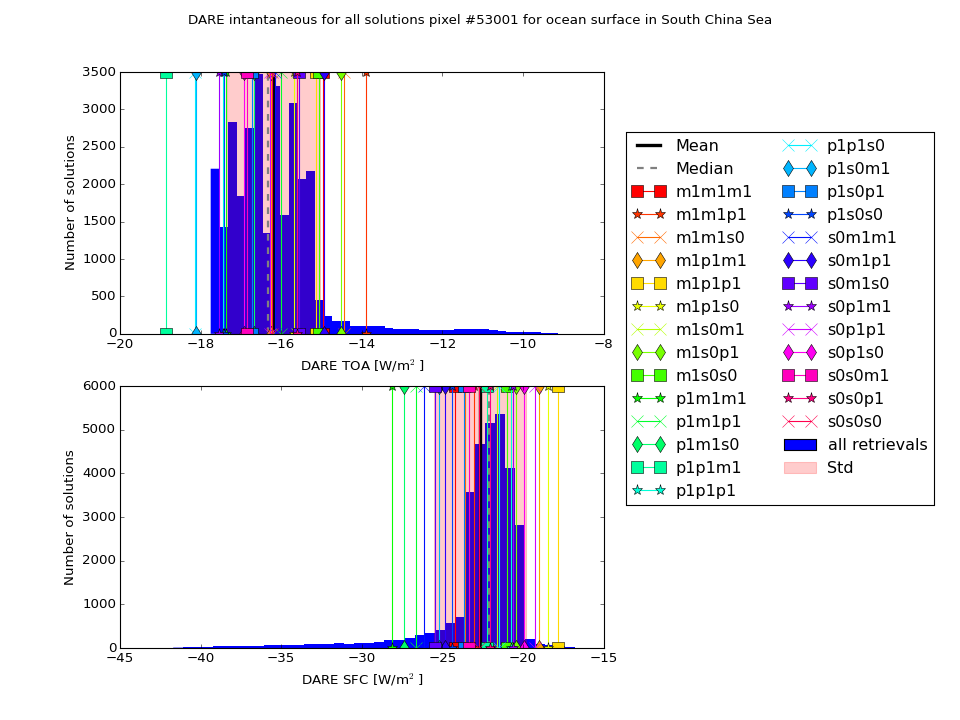

<IPython.core.display.Javascript object>


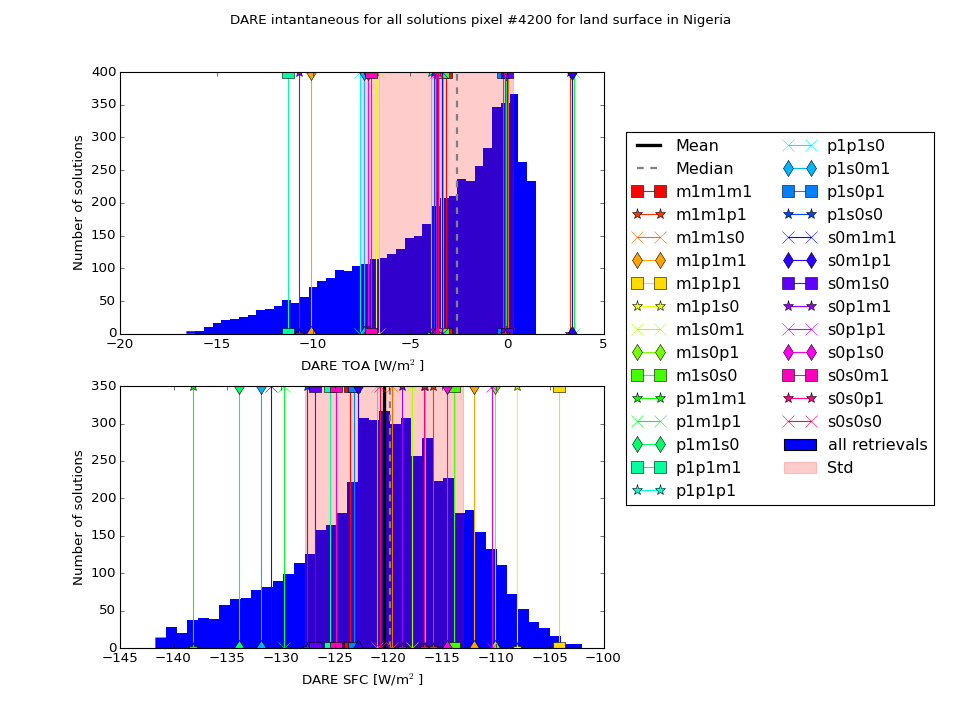

<IPython.core.display.Javascript object>


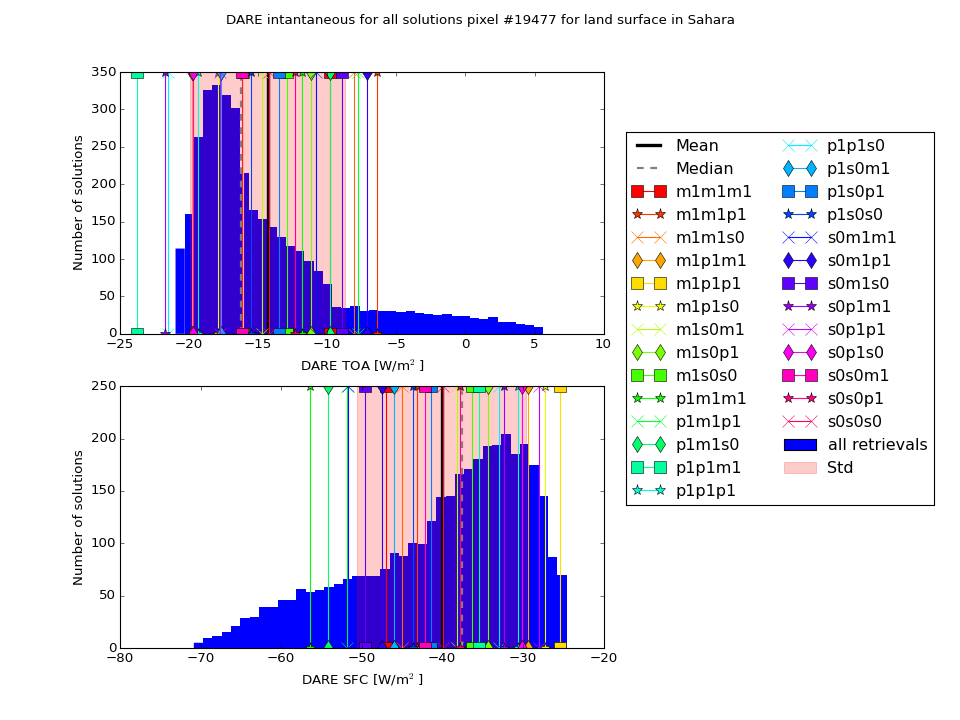

<IPython.core.display.Javascript object>


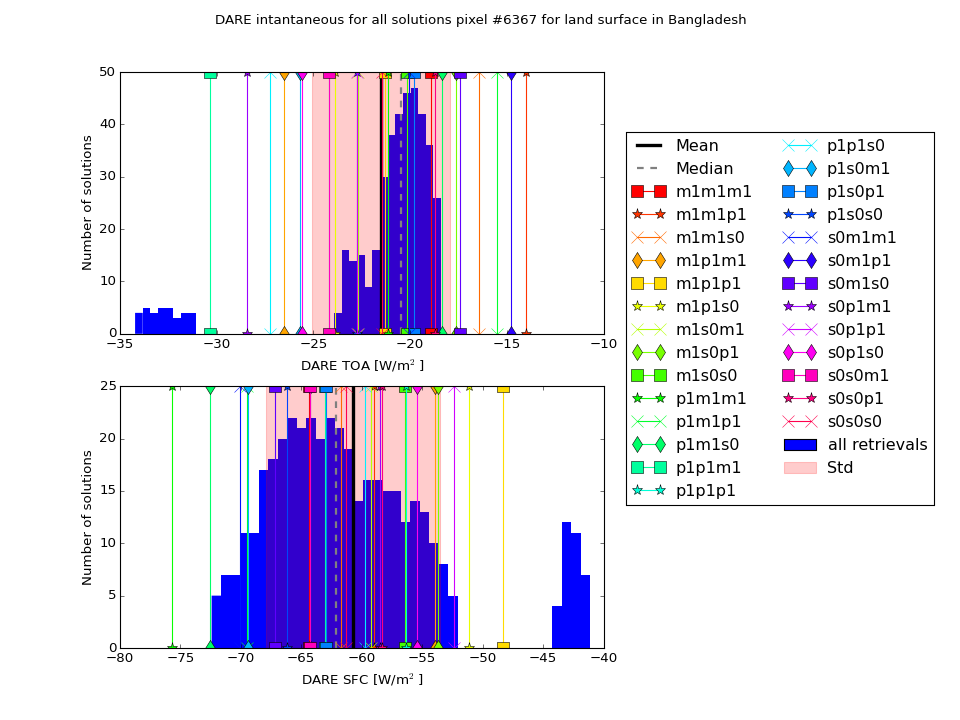

<IPython.core.display.Javascript object>


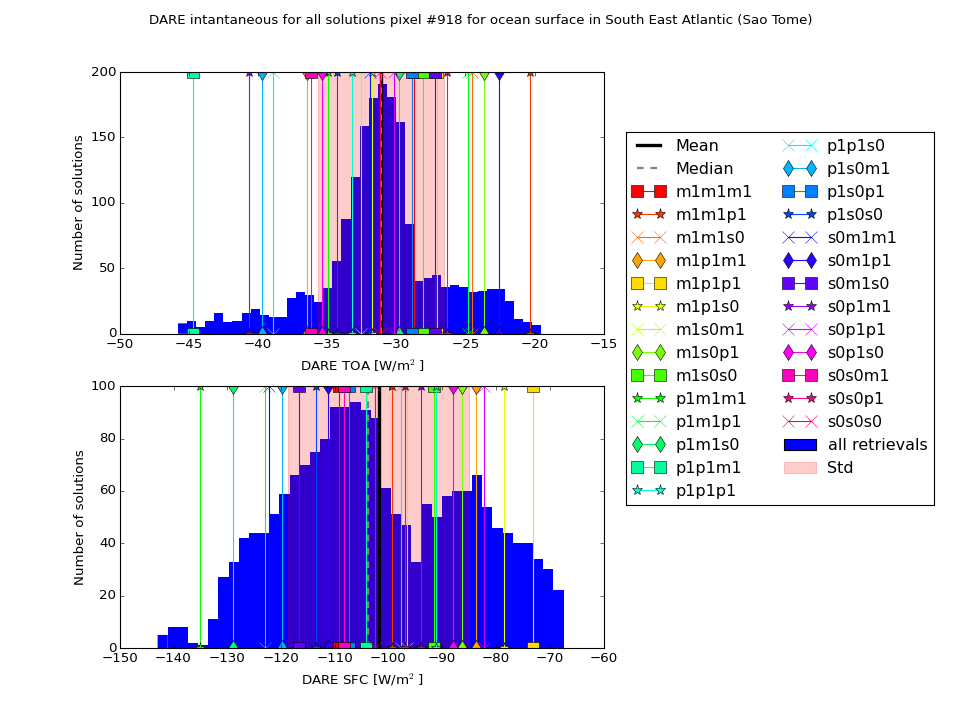

<IPython.core.display.Javascript object>


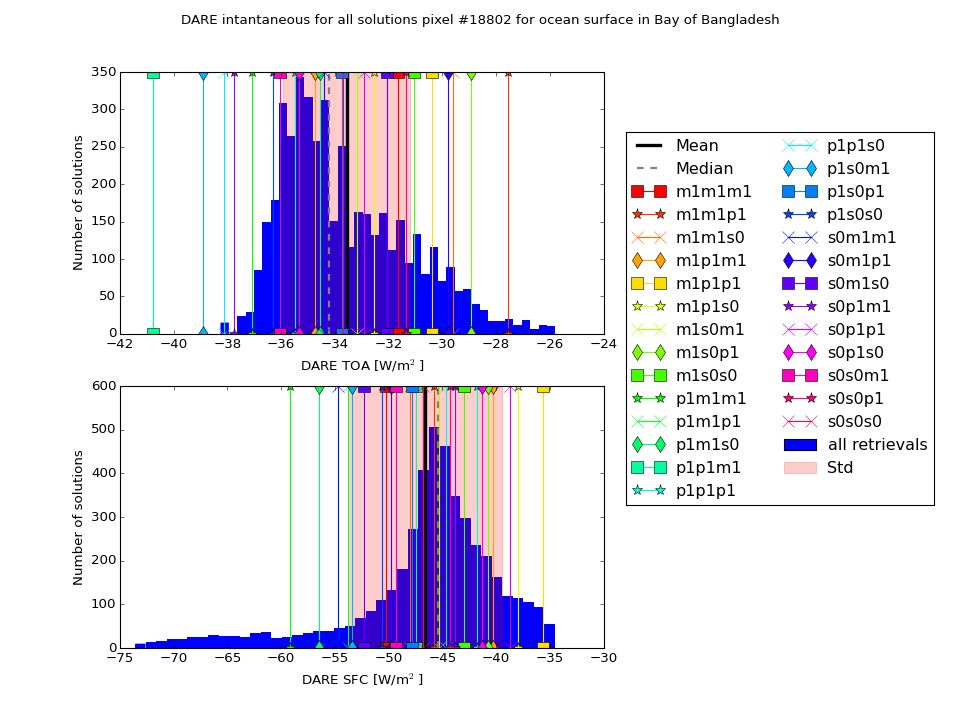

<IPython.core.display.Javascript object>


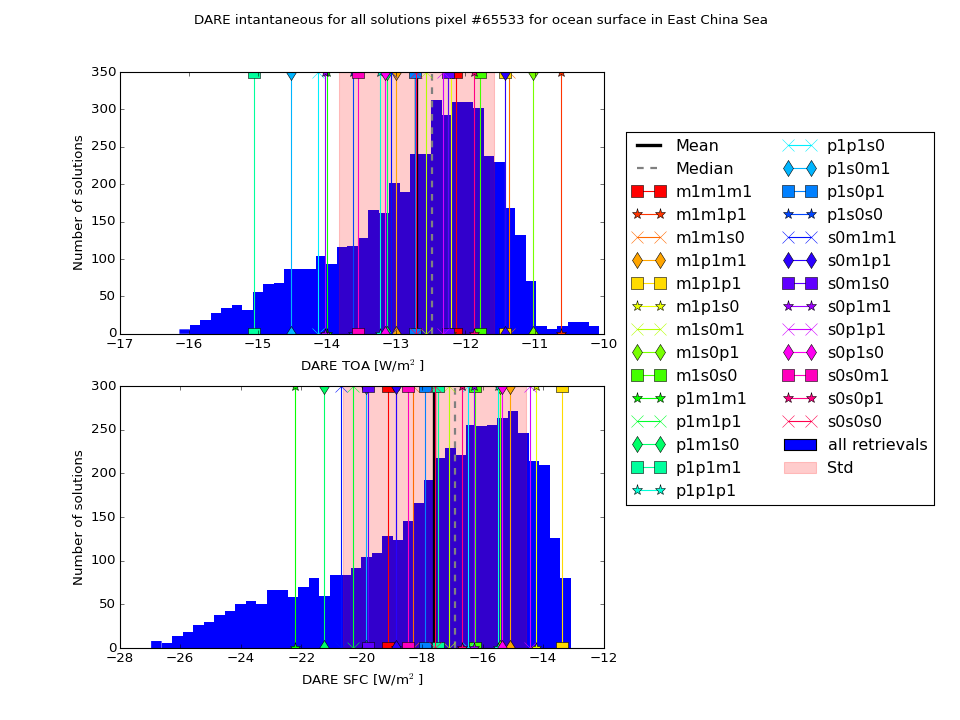

In [10]:
for i,n in enumerate(nums):

    form = {'num':n,'surf':srf_str[surf[i]],'lbl':labels[i],'aod':aods_calipso[i]}
    fig,ax = plt.subplots(2,1,figsize=(12,9))

    ax[0].hist(dftoai[i],bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
    ax[0].axvline(np.mean(dftoai[i]),color='k',lw=3,label='Mean')
    ax[0].axvline(np.median(dftoai[i]),color='grey',ls='--',lw=2,label='Median')
    cs = cm.hsv(np.arange(27)/27.0)
    ms = ['s','*','x','d']
    for j,k in enumerate(np.sort(toa_sel[i].keys())):
        ax[0].axvline(toa_seli[i][k],lw=1,label=k,ls='-',color=tuple(cs[j,:]),marker=ms[j%4],ms=10)
    ax[0].axvspan(np.mean(dftoai[i])-np.std(dftoai[i]), np.mean(dftoai[i])+np.std(dftoai[i]), alpha=0.2, color='red',label='Std')
    ax[0].set_xlabel('DARE TOA [W/m$^2$]')
    ax[0].set_ylabel('Number of solutions')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.65, box.height])


    ax[1].hist(dfsfci[i],bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
    ax[1].axvline(np.mean(dfsfci[i]),color='k',lw=3,label='Mean')
    ax[1].axvline(np.median(dfsfci[i]),color='grey',ls='--',lw=2,label='Median')
    for j,k in enumerate(np.sort(sfc_seli[i].keys())):
        ax[1].axvline(sfc_seli[i][k],lw=1,label=k,ls='-',color=tuple(cs[j,:]),marker=ms[j%4],ms=10)
    ax[1].axvspan(np.mean(dfsfci[i])-np.std(dfsfci[i]), np.mean(dfsfci[i])+np.std(dfsfci[i]), alpha=0.2, color='red',label='Std')
    ax[1].set_xlabel('DARE SFC [W/m$^2$]')
    ax[1].set_ylabel('Number of solutions')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.65, box.height])

    fig.suptitle('DARE intantaneous for all solutions pixel #{num} for {surf} surface in {lbl}'.format(**form))
    plt.legend(bbox_to_anchor=(1.03,2),loc=2,ncol=2)

    plt.savefig(fp+'plot\\DARE_instaneous_{num}_{surf}.png'.format(**form),dpi=600,transparent=True)

# Combine pixels and plot

In [92]:
toa_mean,sfc_mean = [],[]
toa_median,sfc_median = [],[]
toa_pstd,sfc_pstd,toa_mstd,sfc_mstd = [],[],[],[]
toa_std,sfc_std = [],[]

toa_arr_sel = {u:[] for u in toa_sel[0].keys()}
sfc_arr_sel = {u:[] for u in toa_sel[0].keys()}

In [93]:
for i,n in enumerate(nums):
    toa_mean.append(np.mean(dftoa[i]))
    sfc_mean.append(np.mean(dfsfc[i]))
    toa_median.append(np.median(dftoa[i]))
    sfc_median.append(np.median(dfsfc[i]))
    toa_pstd.append(np.mean(dftoa[i])+np.std(dftoa[i]))
    toa_mstd.append(np.mean(dftoa[i])-np.std(dftoa[i]))
    sfc_pstd.append(np.mean(dfsfc[i])+np.std(dfsfc[i]))
    sfc_mstd.append(np.mean(dfsfc[i])-np.std(dfsfc[i]))
    toa_std.append(np.std(dftoa[i]))
    sfc_std.append(np.std(dfsfc[i]))
    
    for j,k in enumerate(np.sort(toa_sel[i].keys())):
        toa_arr_sel[k].append(toa_sel[i][k])
        sfc_arr_sel[k].append(sfc_sel[i][k])
        

In [94]:
toa_arr_sel['spec_avg'] = []
toa_arr_sel['spec_std'] = []
sfc_arr_sel['spec_avg'] = []
sfc_arr_sel['spec_std'] = []

In [95]:
for i,n in enumerate(nums):
    tu = []
    su = []
    for j,k in enumerate(np.sort(toa_sel[i].keys())):
        tu.append(toa_arr_sel[k][i])
        su.append(sfc_arr_sel[k][i])
    toa_arr_sel['spec_avg'].append(np.mean(tu))
    toa_arr_sel['spec_std'].append(np.std(tu))
    sfc_arr_sel['spec_avg'].append(np.mean(su))
    sfc_arr_sel['spec_std'].append(np.std(su))

In [96]:
for n in toa_arr_sel.keys():
    toa_arr_sel[n] = np.array(toa_arr_sel[n])
    sfc_arr_sel[n] = np.array(sfc_arr_sel[n])

## Plot the s0s0s0 values compared to mean DARE

<IPython.core.display.Javascript object>


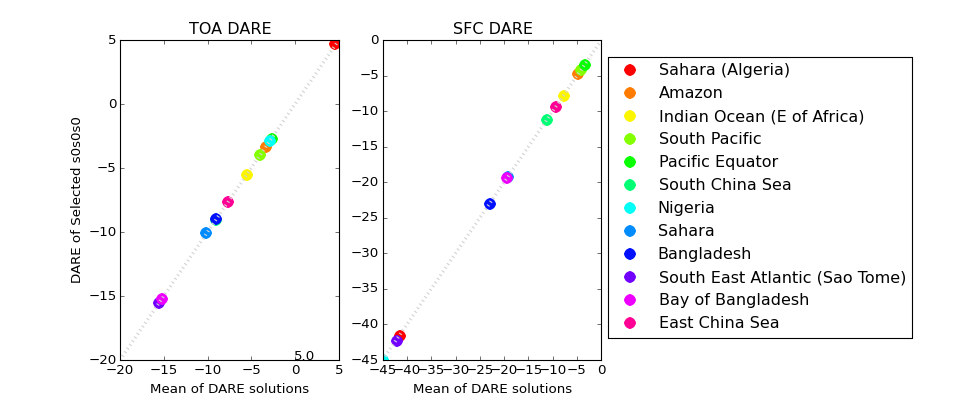

In [9]:
fig,ax = plt.subplots(1,3,figsize=(12,5))
ax[0].plot(toa_mean,toa_arr_sel['s0s0s0'],'x')
cs = cm.hsv(np.arange(len(nums))/float(len(nums)))
for i,n in enumerate(nums):
    ax[0].plot(toa_mean[i],toa_arr_sel['s0s0s0'][i],'o',markersize=10,markeredgecolor='None',label=labels[i],color=cs[i])

a = ax[0].get_xlim()
ax[0].plot(a,a,':',color='lightgrey',lw=3)

r = np.corrcoef(toa_mean,toa_arr_sel['s0s0s0'])[0,1]
ax[0].text(0,a[0],a[1])

ax[0].set_ylabel('DARE of Selected s0s0s0')
ax[0].set_xlabel('Mean of DARE solutions')
ax[0].set_title('TOA DARE')


ax[1].plot(sfc_mean,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(nums):
    ax[1].plot(sfc_mean[i],sfc_arr_sel['s0s0s0'][i],'o',markersize=10,markeredgecolor='None',label=labels[i],color=cs[i])
a = ax[1].get_xlim()
ax[1].plot(a,a,':',color='lightgrey',lw=3)
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean of DARE solutions')

ax[2].set_visible(False)

ax[1].legend(frameon=True,loc=[1.03,0.07],numpoints=1)
plt.savefig(fp+'plot\\DARE_s0s0s0_vs_mean.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


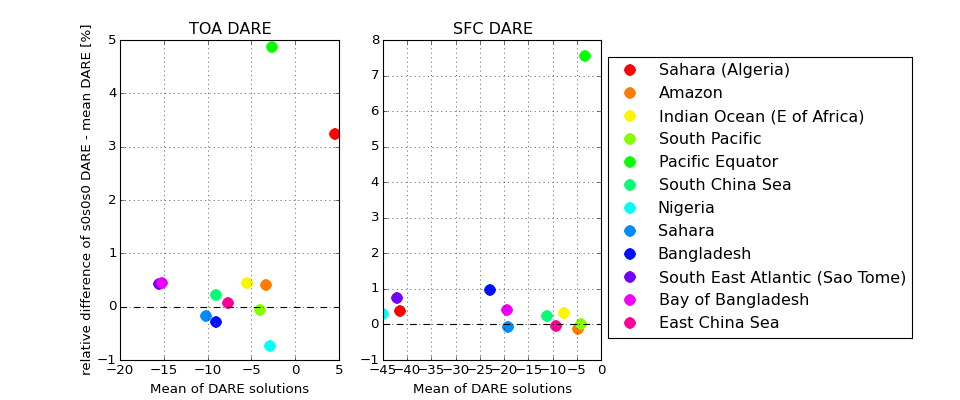

ERROR:root:Line magic function `%ax` not found.
ERROR:root:Line magic function `%ax` not found.


In [10]:
fig,ax = plt.subplots(1,3,figsize=(12,5))
%ax[0].plot(toa_mean,toa_arr_sel['s0s0s0'],'x')
cs = cm.hsv(np.arange(len(nums))/float(len(nums)))
for i,n in enumerate(nums):
    ax[0].plot(toa_mean[i],(toa_arr_sel['s0s0s0'][i]-toa_mean[i])/toa_mean[i]*100.0,'o',markersize=10,
               markeredgecolor='None',label=labels[i],color=cs[i])

ax[0].axhline(0.0,color='k',linestyle='--')
ax[0].set_ylabel('relative difference of s0s0s0 DARE - mean DARE [%]')
ax[0].set_xlabel('Mean of DARE solutions')
ax[0].set_title('TOA DARE')
ax[0].grid()

%ax[1].plot(sfc_mean,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(nums):
    ax[1].plot(sfc_mean[i],(sfc_arr_sel['s0s0s0'][i]-sfc_mean[i])/sfc_mean[i]*100.0,'o',markersize=10,
               markeredgecolor='None',label=labels[i],color=cs[i])
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean of DARE solutions')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].grid()

ax[2].set_visible(False)

ax[1].legend(frameon=True,loc=[1.03,0.07],numpoints=1)
plt.savefig(fp+'plot\\DARE_s0s0s0_vs_mean_reldiff.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


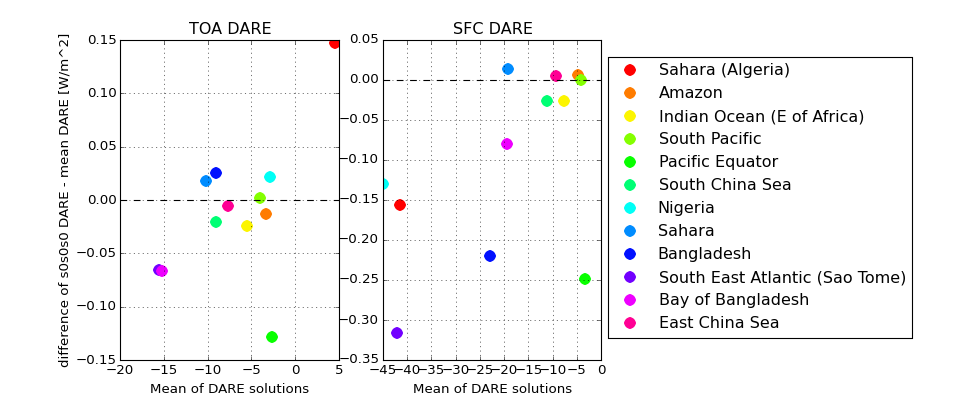

ERROR:root:Line magic function `%ax` not found.
ERROR:root:Line magic function `%ax` not found.


In [30]:
fig,ax = plt.subplots(1,3,figsize=(12,5))
%ax[0].plot(toa_mean,toa_arr_sel['s0s0s0'],'x')
cs = cm.hsv(np.arange(len(nums))/float(len(nums)))
for i,n in enumerate(nums):
    ax[0].plot(toa_mean[i],(toa_arr_sel['s0s0s0'][i]-toa_mean[i]),'o',markersize=10,
               markeredgecolor='None',label=labels[i],color=cs[i])

ax[0].axhline(0.0,color='k',linestyle='--')
ax[0].set_ylabel('difference of s0s0s0 DARE - mean DARE [W/m^2]')
ax[0].set_xlabel('Mean of DARE solutions')
ax[0].set_title('TOA DARE')
ax[0].grid()

%ax[1].plot(sfc_mean,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(nums):
    ax[1].plot(sfc_mean[i],(sfc_arr_sel['s0s0s0'][i]-sfc_mean[i]),'o',markersize=10,
               markeredgecolor='None',label=labels[i],color=cs[i])
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean of DARE solutions')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].grid()

ax[2].set_visible(False)

ax[1].legend(frameon=True,loc=[1.03,0.07],numpoints=1)
plt.savefig(fp+'plot\\DARE_s0s0s0_vs_mean_diff.png',dpi=600,transparent=True)

## Compare the DARE + standard deviation to selected solutions to DARE

<IPython.core.display.Javascript object>


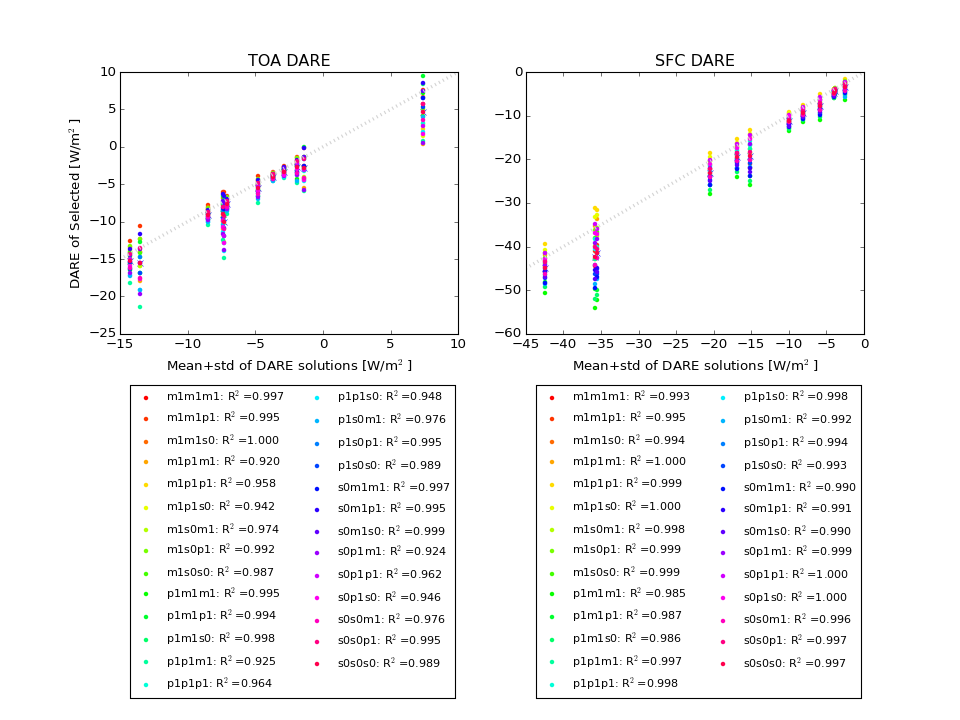

In [46]:
fig,ax = plt.subplots(2,2,figsize=(12,9))
ax = ax.ravel()
ax[0].plot(toa_pstd,toa_arr_sel['s0s0s0'],'x')
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.corrcoef(toa_pstd,toa_arr_sel[n])[0,1]
    ax[0].plot(toa_pstd,toa_arr_sel[n],'o',markersize=4,markeredgecolor='None',label='{}: R$^2$={:.3f}'.format(n,r),color=cs[i])

a = ax[0].get_xlim()
ax[0].plot(a,a,':',color='lightgrey',lw=3)


ax[0].set_ylabel('DARE of Selected [W/m$^2$]')
ax[0].set_xlabel('Mean+std of DARE solutions [W/m$^2$]')
ax[0].set_title('TOA DARE')
ax[0].legend(frameon=True,loc=[0.03,-1.39],numpoints=1,fontsize=10,ncol=2)


ax[1].plot(sfc_pstd,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(sel_list):
    r = np.corrcoef(sfc_pstd,sfc_arr_sel[n])[0,1]
    ax[1].plot(sfc_pstd,sfc_arr_sel[n],'o',markersize=4,markeredgecolor='None',label='{}: R$^2$={:.3f}'.format(n,r),color=cs[i])
a = ax[1].get_xlim()
ax[1].plot(a,a,':',color='lightgrey',lw=3)
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean+std of DARE solutions [W/m$^2$]')

ax[2].set_visible(False)
ax[3].set_visible(False)

ax[1].legend(frameon=True,loc=[0.03,-1.39],numpoints=1,fontsize=10,ncol=2)
plt.savefig(fp+'plot\\DARE_selected_vs_pstd.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


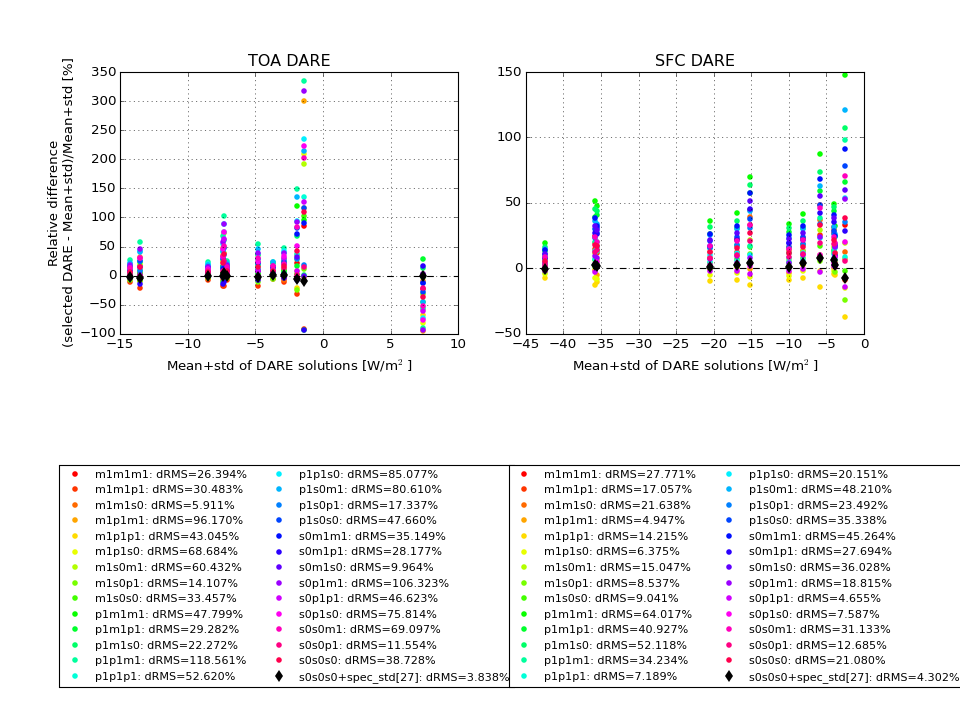

In [62]:
fig,ax = plt.subplots(2,2,figsize=(12,9))
ax = ax.ravel()
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel[n])-np.array(toa_pstd))/toa_pstd*100.0)))
    ax[0].plot(toa_pstd,(np.array(toa_arr_sel[n])-np.array(toa_pstd))/toa_pstd*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.3f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel['spec_std'])+np.array(toa_arr_sel['s0s0s0'])-np.array(toa_pstd))/toa_pstd*100.0)))
ax[0].plot(toa_pstd,(np.array(toa_arr_sel['spec_std'])+np.array(toa_arr_sel['s0s0s0'])-np.array(toa_pstd))/toa_pstd*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0+spec_std[27]: dRMS={:.3f}%'.format(r),color='k')

    
ax[0].axhline(0.0,color='k',linestyle='--')


ax[0].set_xlabel('Mean+std of DARE solutions [W/m$^2$]')
ax[0].set_ylabel('Relative difference \n(selected DARE - Mean+std)/Mean+std [%]')
ax[0].set_title('TOA DARE')
ax[0].grid()
ax[0].legend(frameon=True,loc=[-0.18,-1.35],numpoints=1,fontsize=10,ncol=2)

#ax[1].plot(sfc_pstd,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel[n])-np.array(sfc_pstd))/sfc_pstd*100.0)))
    ax[1].plot(sfc_pstd,(np.array(sfc_arr_sel[n])-np.array(sfc_pstd))/sfc_pstd*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.3f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel['spec_std'])+np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_pstd))/sfc_pstd*100.0)))
ax[1].plot(sfc_pstd,(np.array(sfc_arr_sel['spec_std'])+np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_pstd))/sfc_pstd*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0+spec_std[27]: dRMS={:.3f}%'.format(r),color='k')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean+std of DARE solutions [W/m$^2$]')
ax[1].grid()

ax[2].set_visible(False)
ax[3].set_visible(False)

ax[1].legend(frameon=True,loc=[-0.05,-1.35],numpoints=1,fontsize=10,ncol=2)
plt.savefig(fp+'plot\\DARE_selected_vs_pstd_reldiff.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


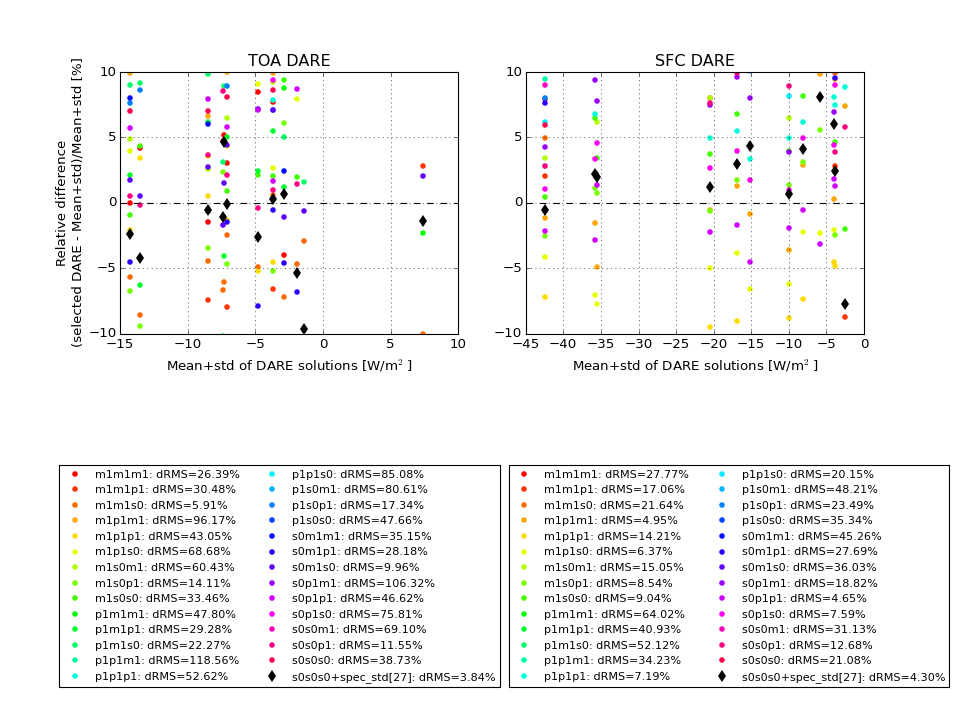

In [68]:
fig,ax = plt.subplots(2,2,figsize=(12,9))
ax = ax.ravel()
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel[n])-np.array(toa_pstd))/toa_pstd*100.0)))
    ax[0].plot(toa_pstd,(np.array(toa_arr_sel[n])-np.array(toa_pstd))/toa_pstd*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.2f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel['spec_std'])+np.array(toa_arr_sel['s0s0s0'])-np.array(toa_pstd))/toa_pstd*100.0)))
ax[0].plot(toa_pstd,(np.array(toa_arr_sel['spec_std'])+np.array(toa_arr_sel['s0s0s0'])-np.array(toa_pstd))/toa_pstd*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0+spec_std[27]: dRMS={:.2f}%'.format(r),color='k')

    
ax[0].axhline(0.0,color='k',linestyle='--')


ax[0].set_xlabel('Mean+std of DARE solutions [W/m$^2$]')
ax[0].set_ylabel('Relative difference \n(selected DARE - Mean+std)/Mean+std [%]')
ax[0].set_title('TOA DARE')
ax[0].grid()
ax[0].set_ylim([-10,10])
ax[0].legend(frameon=True,loc=[-0.18,-1.35],numpoints=1,fontsize=10,ncol=2)

#ax[1].plot(sfc_pstd,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel[n])-np.array(sfc_pstd))/sfc_pstd*100.0)))
    ax[1].plot(sfc_pstd,(np.array(sfc_arr_sel[n])-np.array(sfc_pstd))/sfc_pstd*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.2f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel['spec_std'])+np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_pstd))/sfc_pstd*100.0)))
ax[1].plot(sfc_pstd,(np.array(sfc_arr_sel['spec_std'])+np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_pstd))/sfc_pstd*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0+spec_std[27]: dRMS={:.2f}%'.format(r),color='k')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean+std of DARE solutions [W/m$^2$]')
ax[1].grid()
ax[1].set_ylim([-10,10])

ax[2].set_visible(False)
ax[3].set_visible(False)

ax[1].legend(frameon=True,loc=[-0.05,-1.35],numpoints=1,fontsize=10,ncol=2)
plt.savefig(fp+'plot\\DARE_selected_vs_pstd_reldiff_zoom.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


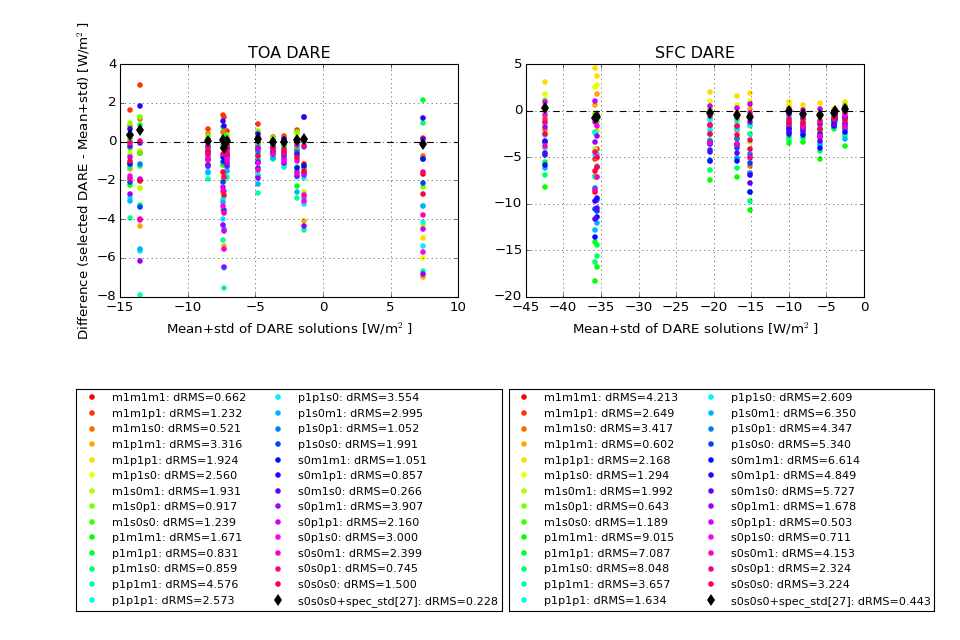

In [67]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax = ax.ravel()
#ax[0].plot(toa_pstd,toa_arr_sel['s0s0s0'],'x')
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square(np.array(toa_arr_sel[n])-np.array(toa_pstd))))
    ax[0].plot(toa_pstd,(np.array(toa_arr_sel[n])-np.array(toa_pstd)),'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.3f}'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel['spec_std'])+np.array(toa_arr_sel['s0s0s0'])-np.array(toa_pstd)))))
ax[0].plot(toa_pstd,(np.array(toa_arr_sel['spec_std'])+np.array(toa_arr_sel['s0s0s0'])-np.array(toa_pstd)),
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0+spec_std[27]: dRMS={:.3f}'.format(r),color='k')

ax[0].axhline(0.0,color='k',linestyle='--')


ax[0].set_xlabel('Mean+std of DARE solutions [W/m$^2$]')
ax[0].set_ylabel('Difference (selected DARE - Mean+std) [W/m$^2$]')
ax[0].set_title('TOA DARE')
ax[0].grid()
ax[0].legend(frameon=True,loc=[-0.13,-1.35],numpoints=1,fontsize=10,ncol=2)

#ax[1].plot(sfc_pstd,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square(np.array(sfc_arr_sel[n])-np.array(sfc_pstd))))
    ax[1].plot(sfc_pstd,(np.array(sfc_arr_sel[n])-np.array(sfc_pstd)),'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.3f}'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel['spec_std'])+np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_pstd)))))
ax[1].plot(sfc_pstd,(np.array(sfc_arr_sel['spec_std'])+np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_pstd)),
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0+spec_std[27]: dRMS={:.3f}'.format(r),color='k')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean+std of DARE solutions [W/m$^2$]')
ax[1].grid()

ax[1].legend(frameon=True,loc=[-0.05,-1.35],numpoints=1,fontsize=10,ncol=2)
ax[2].set_visible(False)
ax[3].set_visible(False)
plt.savefig(fp+'plot\\DARE_selected_vs_pstd_diff.png',dpi=600,transparent=True)

## Compare the DARE - standard deviation to selected solutions to DARE

<IPython.core.display.Javascript object>


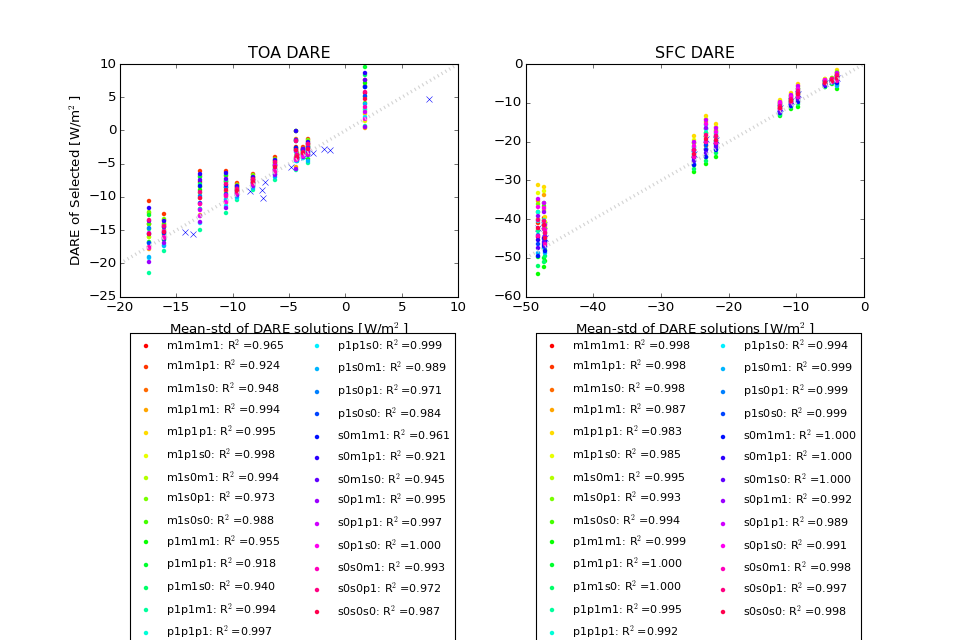

In [71]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax = ax.ravel()
ax[0].plot(toa_pstd,toa_arr_sel['s0s0s0'],'x')
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.corrcoef(toa_mstd,toa_arr_sel[n])[0,1]
    ax[0].plot(toa_mstd,toa_arr_sel[n],'o',markersize=4,markeredgecolor='None',label='{}: R$^2$={:.3f}'.format(n,r),color=cs[i])

a = ax[0].get_xlim()
ax[0].plot(a,a,':',color='lightgrey',lw=3)


ax[0].set_ylabel('DARE of Selected [W/m$^2$]')
ax[0].set_xlabel('Mean-std of DARE solutions [W/m$^2$]')
ax[0].set_title('TOA DARE')
ax[0].legend(frameon=True,loc=[0.03,-1.5],numpoints=1,fontsize=10,ncol=2)

ax[1].plot(sfc_mstd,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(sel_list):
    r = np.corrcoef(sfc_mstd,sfc_arr_sel[n])[0,1]
    ax[1].plot(sfc_mstd,sfc_arr_sel[n],'o',markersize=4,markeredgecolor='None',label='{}: R$^2$={:.3f}'.format(n,r),color=cs[i])
a = ax[1].get_xlim()
ax[1].plot(a,a,':',color='lightgrey',lw=3)
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean-std of DARE solutions [W/m$^2$]')

ax[1].legend(frameon=True,loc=[0.03,-1.5],numpoints=1,fontsize=10,ncol=2)
ax[2].set_visible(False)
ax[3].set_visible(False)

plt.savefig(fp+'plot\\DARE_selected_vs_mstd.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


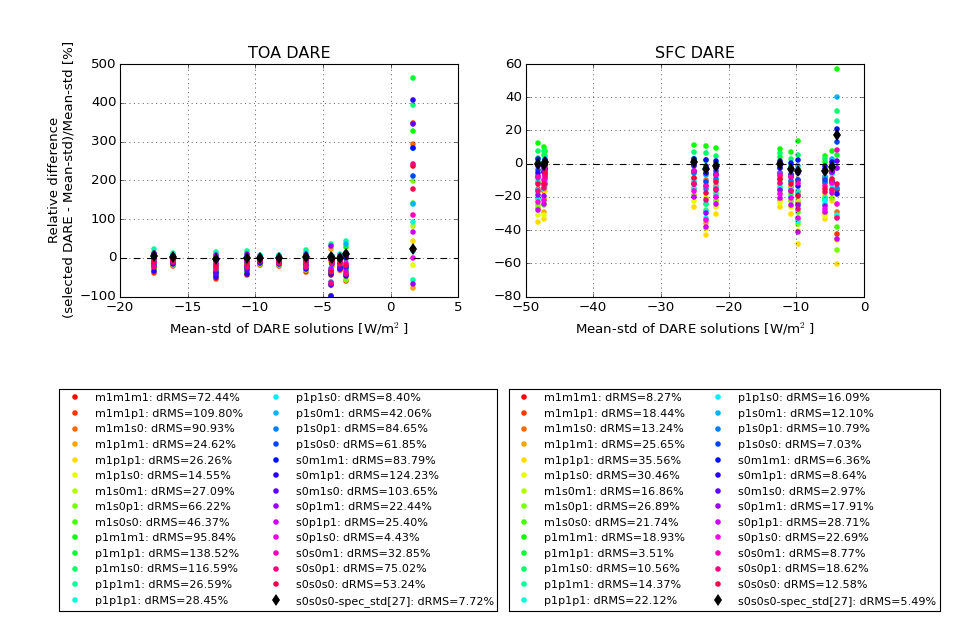

In [79]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax = ax.ravel()
#ax[0].plot(toa_pstd,toa_arr_sel['s0s0s0'],'x')
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel[n])-np.array(toa_mstd))/toa_mstd*100.0)))
    ax[0].plot(toa_mstd,(np.array(toa_arr_sel[n])-np.array(toa_mstd))/toa_mstd*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.2f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel['s0s0s0'])-np.array(toa_arr_sel['spec_std'])-np.array(toa_mstd))/toa_mstd*100.0)))
ax[0].plot(toa_mstd,(np.array(toa_arr_sel['s0s0s0'])-np.array(toa_arr_sel['spec_std'])-np.array(toa_mstd))/toa_mstd*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0-spec_std[27]: dRMS={:.2f}%'.format(r),color='k')
ax[0].axhline(0.0,color='k',linestyle='--')


ax[0].set_xlabel('Mean-std of DARE solutions [W/m$^2$]')
ax[0].set_ylabel('Relative difference \n(selected DARE - Mean-std)/Mean-std [%]')
ax[0].set_title('TOA DARE')
ax[0].grid()
ax[0].legend(frameon=True,loc=[-0.18,-1.35],numpoints=1,fontsize=10,ncol=2)
#ax[1].plot(sfc_pstd,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel[n])-np.array(sfc_mstd))/sfc_mstd*100.0)))
    ax[1].plot(sfc_mstd,(np.array(sfc_arr_sel[n])-np.array(sfc_mstd))/sfc_mstd*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.2f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_arr_sel['spec_std'])-np.array(sfc_mstd))/sfc_mstd*100.0)))
ax[1].plot(sfc_mstd,(np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_arr_sel['spec_std'])-np.array(sfc_mstd))/sfc_mstd*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0-spec_std[27]: dRMS={:.2f}%'.format(r),color='k')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean-std of DARE solutions [W/m$^2$]')
ax[1].grid()

ax[1].legend(frameon=True,loc=[-0.05,-1.35],numpoints=1,fontsize=10,ncol=2)
ax[2].set_visible(False)
ax[3].set_visible(False)

plt.savefig(fp+'plot\\DARE_selected_vs_mstd_reldiff.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


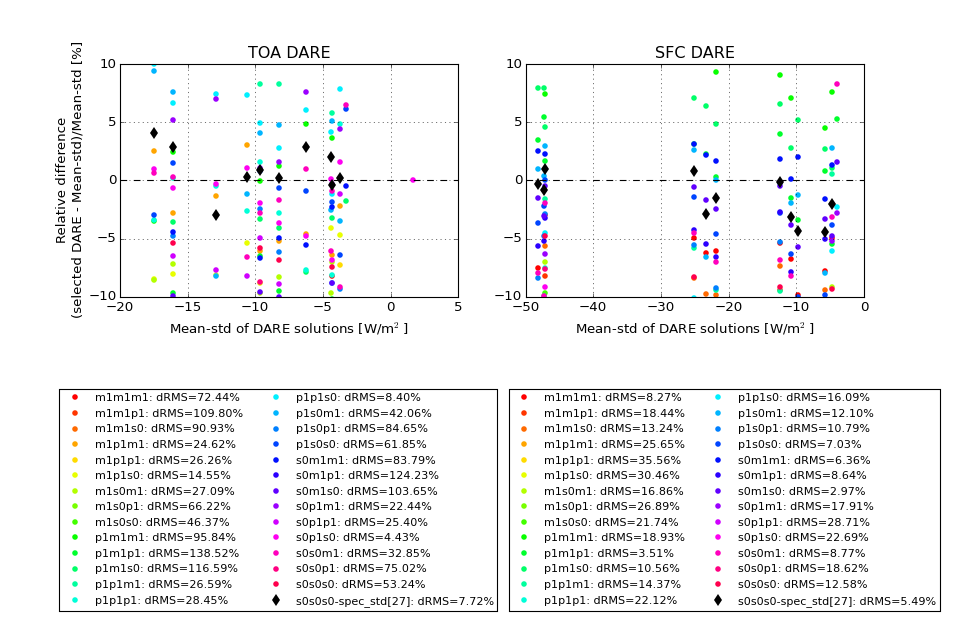

In [80]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax = ax.ravel()
#ax[0].plot(toa_pstd,toa_arr_sel['s0s0s0'],'x')
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel[n])-np.array(toa_mstd))/toa_mstd*100.0)))
    ax[0].plot(toa_mstd,(np.array(toa_arr_sel[n])-np.array(toa_mstd))/toa_mstd*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.2f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel['s0s0s0'])-np.array(toa_arr_sel['spec_std'])-np.array(toa_mstd))/toa_mstd*100.0)))
ax[0].plot(toa_mstd,(np.array(toa_arr_sel['s0s0s0'])-np.array(toa_arr_sel['spec_std'])-np.array(toa_mstd))/toa_mstd*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0-spec_std[27]: dRMS={:.2f}%'.format(r),color='k')
ax[0].axhline(0.0,color='k',linestyle='--')


ax[0].set_xlabel('Mean-std of DARE solutions [W/m$^2$]')
ax[0].set_ylabel('Relative difference \n(selected DARE - Mean-std)/Mean-std [%]')
ax[0].set_title('TOA DARE')
ax[0].grid()
ax[0].set_ylim([-10,10])
ax[0].legend(frameon=True,loc=[-0.18,-1.35],numpoints=1,fontsize=10,ncol=2)
#ax[1].plot(sfc_pstd,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel[n])-np.array(sfc_mstd))/sfc_mstd*100.0)))
    ax[1].plot(sfc_mstd,(np.array(sfc_arr_sel[n])-np.array(sfc_mstd))/sfc_mstd*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.2f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_arr_sel['spec_std'])-np.array(sfc_mstd))/sfc_mstd*100.0)))
ax[1].plot(sfc_mstd,(np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_arr_sel['spec_std'])-np.array(sfc_mstd))/sfc_mstd*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0-spec_std[27]: dRMS={:.2f}%'.format(r),color='k')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean-std of DARE solutions [W/m$^2$]')
ax[1].grid()
ax[1].set_ylim([-10,10])

ax[1].legend(frameon=True,loc=[-0.05,-1.35],numpoints=1,fontsize=10,ncol=2)
ax[2].set_visible(False)
ax[3].set_visible(False)

plt.savefig(fp+'plot\\DARE_selected_vs_mstd_reldiff_zoom.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


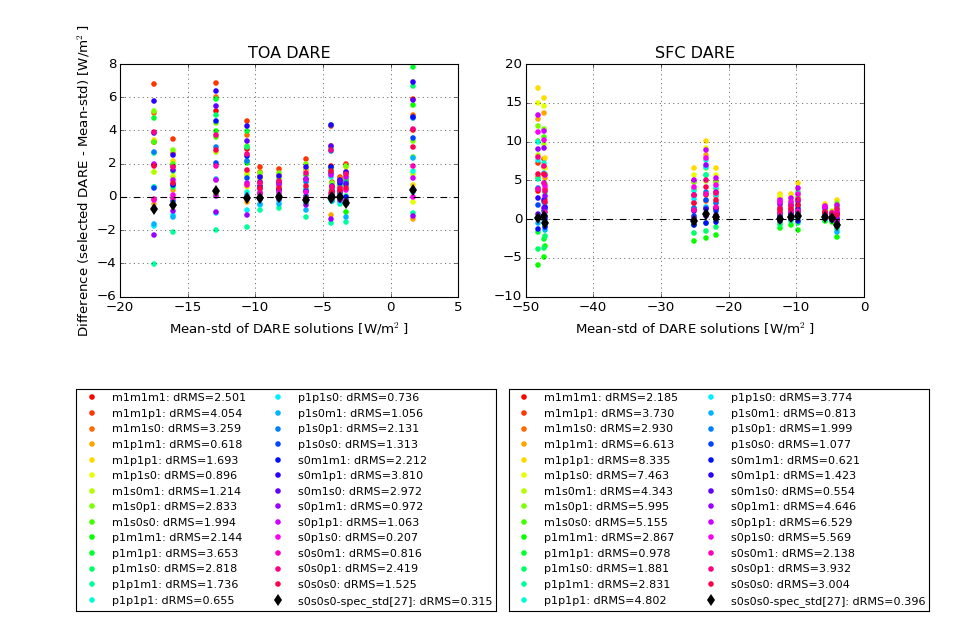

In [83]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax = ax.ravel()
#ax[0].plot(toa_pstd,toa_arr_sel['s0s0s0'],'x')
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square(np.array(toa_arr_sel[n])-np.array(toa_mstd))))
    ax[0].plot(toa_mstd,(np.array(toa_arr_sel[n])-np.array(toa_mstd)),'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.3f}'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(toa_arr_sel['s0s0s0'])-np.array(toa_arr_sel['spec_std'])-np.array(toa_mstd)))))
ax[0].plot(toa_mstd,(np.array(toa_arr_sel['s0s0s0'])-np.array(toa_arr_sel['spec_std'])-np.array(toa_mstd)),
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0-spec_std[27]: dRMS={:.3f}'.format(r),color='k')

ax[0].axhline(0.0,color='k',linestyle='--')


ax[0].set_xlabel('Mean-std of DARE solutions [W/m$^2$]')
ax[0].set_ylabel('Difference (selected DARE - Mean-std) [W/m$^2$]')
ax[0].set_title('TOA DARE')
ax[0].grid()
ax[0].legend(frameon=True,loc=[-0.13,-1.35],numpoints=1,fontsize=10,ncol=2)

#ax[1].plot(sfc_pstd,sfc_arr_sel['s0s0s0'],'x')
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square(np.array(sfc_arr_sel[n])-np.array(sfc_mstd))))
    ax[1].plot(sfc_mstd,(np.array(sfc_arr_sel[n])-np.array(sfc_mstd)),'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.3f}'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_arr_sel['spec_std'])-np.array(sfc_mstd)))))
ax[1].plot(sfc_mstd,(np.array(sfc_arr_sel['s0s0s0'])-np.array(sfc_arr_sel['spec_std'])-np.array(sfc_mstd)),
           'd',markersize=8,markeredgecolor='None',
           label='s0s0s0-spec_std[27]: dRMS={:.3f}'.format(r),color='k')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].set_title('SFC DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('Mean-std of DARE solutions [W/m$^2$]')
ax[1].grid()

ax[1].legend(frameon=True,loc=[-0.05,-1.35],numpoints=1,fontsize=10,ncol=2)
ax[2].set_visible(False)
ax[3].set_visible(False)
plt.savefig(fp+'plot\\DARE_selected_vs_mstd_diff.png',dpi=600,transparent=True)

## Comparing the std 

<IPython.core.display.Javascript object>


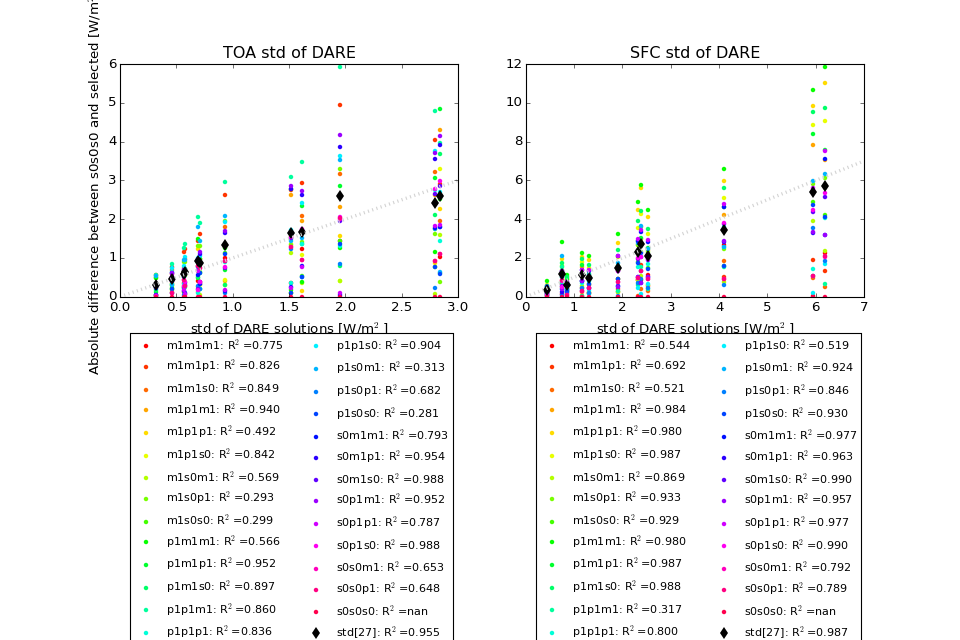

In [111]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax = ax.ravel()
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.corrcoef(toa_std,np.abs(toa_arr_sel[n]-toa_arr_sel['s0s0s0']))[0,1]
    ax[0].plot(toa_std,np.abs(toa_arr_sel[n]-toa_arr_sel['s0s0s0']),
               'o',markersize=4,markeredgecolor='None',label='{}: R$^2$={:.3f}'.format(n,r),color=cs[i])
r = np.corrcoef(toa_std,toa_arr_sel['spec_std'])[0,1]
ax[0].plot(toa_std,toa_arr_sel['spec_std'],
           'd',markersize=8,markeredgecolor='None',label='std[27]: R$^2$={:.3f}'.format(r),color='k')

a = ax[0].get_xlim()
ax[0].plot(a,a,':',color='lightgrey',lw=3)


ax[0].set_ylabel('Absolute difference between s0s0s0 and selected [W/m$^2$]')
ax[0].set_xlabel('std of DARE solutions [W/m$^2$]')
ax[0].set_title('TOA std of DARE')
ax[0].legend(frameon=True,loc=[0.03,-1.5],numpoints=1,fontsize=10,ncol=2)

for i,n in enumerate(sel_list):
    r = np.corrcoef(sfc_std,np.abs(sfc_arr_sel[n]-sfc_arr_sel['s0s0s0']))[0,1]
    ax[1].plot(sfc_std,np.abs(sfc_arr_sel[n]-sfc_arr_sel['s0s0s0']),
               'o',markersize=4,markeredgecolor='None',label='{}: R$^2$={:.3f}'.format(n,r),color=cs[i])
r = np.corrcoef(sfc_std,sfc_arr_sel['spec_std'])[0,1]
ax[1].plot(sfc_std,sfc_arr_sel['spec_std'],
           'd',markersize=8,markeredgecolor='None',label='std[27]: R$^2$={:.3f}'.format(r),color='k')
a = ax[1].get_xlim()
ax[1].plot(a,a,':',color='lightgrey',lw=3)
ax[1].set_title('SFC std of DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('std of DARE solutions [W/m$^2$]')

ax[1].legend(frameon=True,loc=[0.03,-1.5],numpoints=1,fontsize=10,ncol=2)
ax[2].set_visible(False)
ax[3].set_visible(False)

plt.savefig(fp+'plot\\stdDARE_selected_vs_std.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


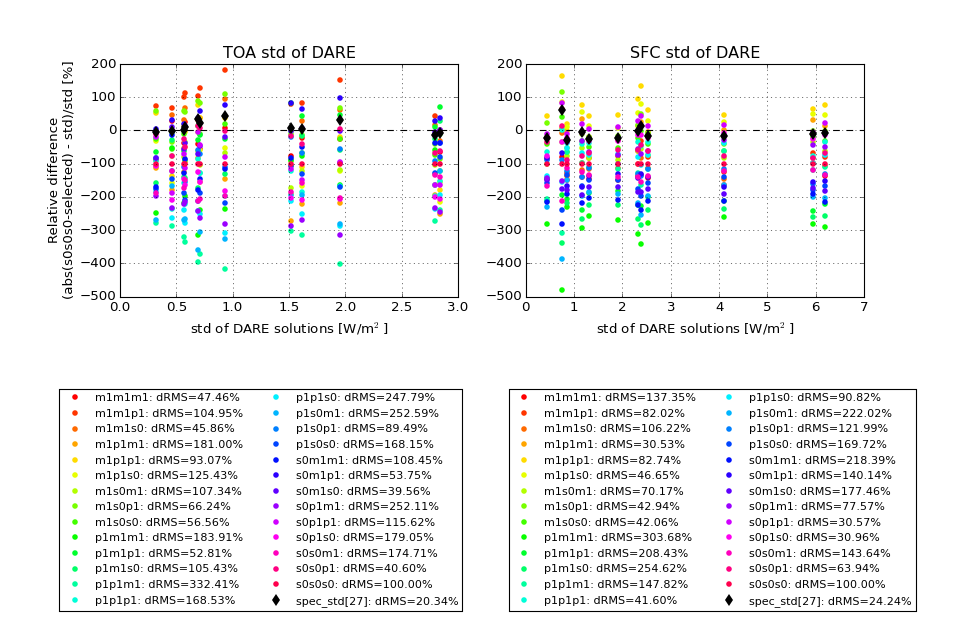

In [110]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax = ax.ravel()
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((toa_arr_sel[n]-toa_arr_sel['s0s0s0']-np.array(toa_std))/toa_std*100.0)))
    ax[0].plot(toa_std,(toa_arr_sel[n]-toa_arr_sel['s0s0s0']-np.array(toa_std))/toa_std*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.2f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((toa_arr_sel['spec_std']-np.array(toa_std))/toa_std*100.0)))
ax[0].plot(toa_std,(toa_arr_sel['spec_std']-np.array(toa_std))/toa_std*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='spec_std[27]: dRMS={:.2f}%'.format(r),color='k')
ax[0].axhline(0.0,color='k',linestyle='--')


ax[0].set_xlabel('std of DARE solutions [W/m$^2$]')
ax[0].set_ylabel('Relative difference \n(abs(s0s0s0-selected) - std)/std [%]')
ax[0].set_title('TOA std of DARE')
ax[0].grid()
ax[0].legend(frameon=True,loc=[-0.18,-1.35],numpoints=1,fontsize=10,ncol=2)

for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((sfc_arr_sel[n]-sfc_arr_sel['s0s0s0']-np.array(sfc_std))/sfc_std*100.0)))
    ax[1].plot(sfc_std,(sfc_arr_sel[n]-sfc_arr_sel['s0s0s0']-np.array(sfc_std))/sfc_std*100.0,'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.2f}%'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((sfc_arr_sel['spec_std']-np.array(sfc_std))/sfc_std*100.0)))
ax[1].plot(sfc_std,(sfc_arr_sel['spec_std']-np.array(sfc_std))/sfc_std*100.0,
           'd',markersize=8,markeredgecolor='None',
           label='spec_std[27]: dRMS={:.2f}%'.format(r),color='k')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].set_title('SFC std of DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('std of DARE solutions [W/m$^2$]')
ax[1].grid()

ax[1].legend(frameon=True,loc=[-0.05,-1.35],numpoints=1,fontsize=10,ncol=2)
ax[2].set_visible(False)
ax[3].set_visible(False)

plt.savefig(fp+'plot\\stdDARE_selected_vs_std_reldiff.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


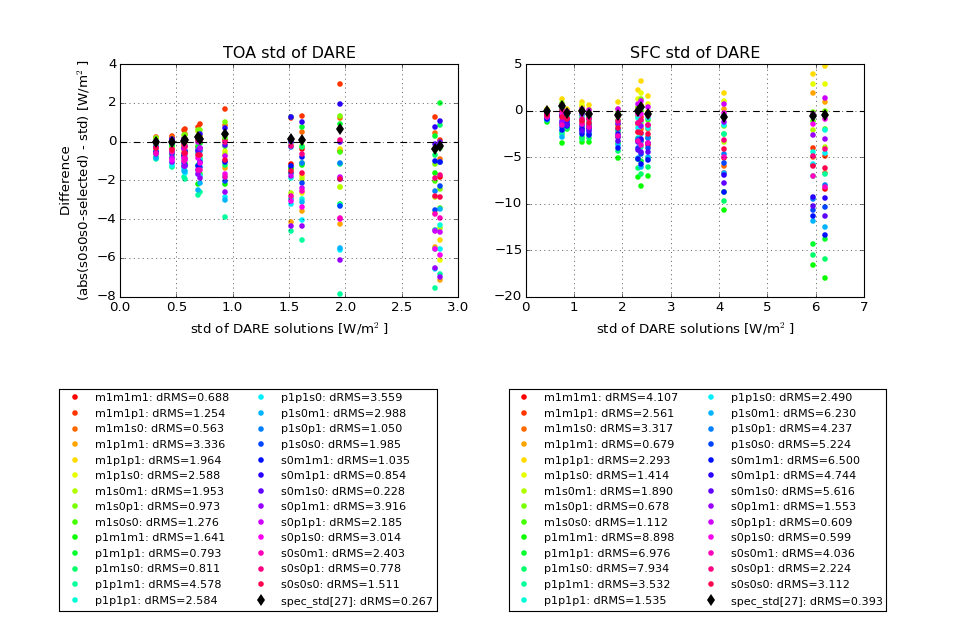

In [109]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax = ax.ravel()
cs = cm.hsv(np.arange(len(sel_list))/float(len(sel_list)))
for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((toa_arr_sel[n]-toa_arr_sel['s0s0s0']-np.array(toa_std)))))
    ax[0].plot(toa_std,(toa_arr_sel[n]-toa_arr_sel['s0s0s0']-np.array(toa_std)),'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.3f}'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((toa_arr_sel['spec_std']-np.array(toa_std)))))
ax[0].plot(toa_std,(toa_arr_sel['spec_std']-np.array(toa_std)),
           'd',markersize=8,markeredgecolor='None',
           label='spec_std[27]: dRMS={:.3f}'.format(r),color='k')
ax[0].axhline(0.0,color='k',linestyle='--')


ax[0].set_xlabel('std of DARE solutions [W/m$^2$]')
ax[0].set_ylabel('Difference \n(abs(s0s0s0-selected) - std) [W/m$^2$]')
ax[0].set_title('TOA std of DARE')
ax[0].grid()
ax[0].legend(frameon=True,loc=[-0.18,-1.35],numpoints=1,fontsize=10,ncol=2)

for i,n in enumerate(sel_list):
    r = np.sqrt(np.mean(np.square((sfc_arr_sel[n]-sfc_arr_sel['s0s0s0']-np.array(sfc_std)))))
    ax[1].plot(sfc_std,(sfc_arr_sel[n]-sfc_arr_sel['s0s0s0']-np.array(sfc_std)),'o',markersize=5,markeredgecolor='None',
               label='{}: dRMS={:.3f}'.format(n,r),color=cs[i])
r = np.sqrt(np.mean(np.square((sfc_arr_sel['spec_std']-np.array(sfc_std)))))
ax[1].plot(sfc_std,(sfc_arr_sel['spec_std']-np.array(sfc_std)),
           'd',markersize=8,markeredgecolor='None',
           label='spec_std[27]: dRMS={:.3f}'.format(r),color='k')
ax[1].axhline(0.0,color='k',linestyle='--')
ax[1].set_title('SFC std of DARE')
#ax[1].set_ylabel('Selected s0s0s0')
ax[1].set_xlabel('std of DARE solutions [W/m$^2$]')
ax[1].grid()

ax[1].legend(frameon=True,loc=[-0.05,-1.35],numpoints=1,fontsize=10,ncol=2)
ax[2].set_visible(False)
ax[3].set_visible(False)

plt.savefig(fp+'plot\\stdDARE_selected_vs_std_diff.png',dpi=600,transparent=True)